### *CONTEXTO*

 El cliente ZetaNet es una empresa prestadora de servicios de telecomunicaciones en Argentina ha encargado la realización de un análisis completo que permita reconocer el comportamiento de este sector a nivel nacional. Se condidera que la principal actividad de la empresa es brindar acceso a internet, pero también es importante considerar el comportamiento asociado al resto de los servicios de comunicación, con el fin de orientar a la empresa en brindar una buena calidad de sus servicios, identificar oportunidades de crecimiento y poder plantear soluciones personalizadas a sus posibles clientes.

Este documento detalla el proceso realizado para llevar a cabo el análisis de los datos proporcionados públicamente por el ENACOM.

Los objetivos del análisis son los siguientes:

- Carga y corrección de datos: Se incluye la revisión del formato de los datos y la identificación y tratamiento de valores nulos.
- Inspección preliminar: Evaluación individual de los documentos suministrados, con el fin de obtener una visión general de los datos disponibles.
- Selección de datos relevantes: Identificación de los archivos y datos más pertinentes para un análisis en profundidad.
- Análisis detallado: Exploración exhaustiva de los datos para identificar patrones, métricas clave y la definición de indicadores clave de rendimiento (KPIs).


### *ETL Y ANALISIS PRELIMINAR* 

In [165]:
# Importar la librerias necesarias 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

Dentro del archivo principal (internet.xlsx) se encuentran 15 hojas:

Acc_vel_loc_sinrangos: Datos de acceso por localidad sin rangos de velocidad.
Velocidad_sin_Rangos: Información sobre la velocidad de conexión a internet sin rangos específicos.
Accesos_tecnologia_localidad: Accesos a internet por tipo de tecnología y localidad.
Velocidad % por prov: Distribución porcentual de la velocidad de conexión a internet por provincia.
Totales VMD: Totales de velocidad media descargada (VMD).
Totales Accesos Por Tecnología: Totales de accesos a internet desglosados por tecnología.
Accesos Por Tecnología: Accesos a internet por tipo de tecnología.
Penetración-poblacion: Penetración de internet en la población.
Penetracion-hogares: Penetración de internet en hogares.
Penetracion-totales: Totales de penetración de internet.
Totales Accesos por velocidad: Totales de accesos a internet desglosados por velocidad de conexión.
Accesos por velocidad: Accesos a internet desglosados por velocidad de conexión.
Dial-BAf: Accesos dial-up y Banda Ancha Fija (BAf).
Totales Dial-BAf: Totales de accesos dial-up y Banda Ancha Fija (BAf).
Ingresos: Ingresos generados por los servicios de internet en miles de pesos.

Se realiza una observación individual se decidirá cuál de las hojas contiene datos relevantes y cuáles pueden o deben ser descartados.

In [166]:
#Importar datos

internet_sheets = '../Data/Internet.xlsx'

### *Analisis preliminar : Acc_vel_loc_sinrangos*

In [167]:
Acc_vel_loc_sinrangos = pd.read_excel('Internet.xlsx', sheet_name=0)

In [168]:
Acc_vel_loc_sinrangos.info()
Acc_vel_loc_sinrangos.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3065 entries, 0 to 3064
Columns: 125 entries, Provincia to 10000 Mbps
dtypes: float64(121), object(4)
memory usage: 2.9+ MB


Provincia     Partido          Localidad Link Indec  Otros  0,256 Mbps  \
0  BUENOS AIRES  25 de Mayo         25 de Mayo    6854100    NaN         NaN   
1  BUENOS AIRES  25 de Mayo    Agustín Mosconi    6854010    NaN         NaN   
2  BUENOS AIRES  25 de Mayo          Del Valle    6854020    NaN         NaN   
3  BUENOS AIRES  25 de Mayo          Ernestina    6854030    NaN         NaN   
4  BUENOS AIRES  25 de Mayo  Gobernador Ugarte    6854040    NaN         NaN   

   0,5 Mbps  0,512 Mbps  0,75 Mbps  1 Mbps  ...  680 Mbps  700 Mbps  800 Mbps  \
0       2.0         NaN       19.0     NaN  ...       NaN       NaN       NaN   
1       NaN         NaN        NaN     NaN  ...       NaN       NaN       NaN   
2       1.0         NaN        NaN     NaN  ...       NaN       NaN       NaN   
3       NaN         NaN        NaN     NaN  ...       NaN       NaN       NaN   
4       NaN         NaN        NaN     NaN  ...       NaN       NaN       NaN   

   850 Mbps  900 Mbps  999 Mbps  1000 Mbps  1024 Mbps  4000 Mbps  10000 Mbps  
0       NaN       NaN       NaN        NaN        NaN        NaN         NaN  
1       NaN       NaN       NaN        NaN        NaN        NaN         NaN  
2       NaN       NaN       NaN        NaN        NaN        NaN         NaN  
3       NaN       NaN       NaN        NaN        NaN        NaN         NaN  
4       NaN       NaN       NaN        NaN        NaN        NaN         NaN  

[5 rows x 125 columns]

con esta informacion podemos observar una gran catidad de valores nulos. 

In [169]:
# Cálculo del total de celdas nulas:
total_nulos = Acc_vel_loc_sinrangos.isnull().sum().sum()

# Cálculo del total de celdas en el DataFrame:
total = Acc_vel_loc_sinrangos.size

#Cálculo del total de celdas no nulas:
total_no_nulos = total - total_nulos

(np.float64(-1.099999782294077),
 np.float64(1.0999999856448308),
 np.float64(-1.0999998417187002),
 np.float64(1.0999999924627952))

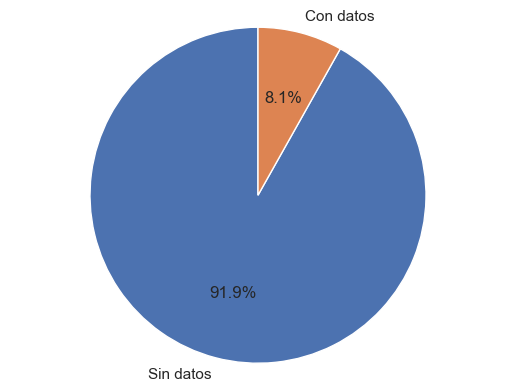

In [170]:
# Preparacion de datos para grafico de pastel 
labels = 'Sin datos', 'Con datos'
sizes = [total_nulos, total_no_nulos]

# Generación del gráfico de pastel
fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
ax.axis('equal')

In [171]:
#Cálculo y salida del porcentaje de celdas nulas
print(f'El {round((total_nulos/total)*100, 2)}% de de esta hoja son datos nulos')

El 91.85% de de esta hoja son datos nulos


### *Analisis preliminar : Velocidad Sin Rangos*

In [172]:
Velocidad_sin_Rangos = pd.read_excel('Internet.xlsx', sheet_name=1)

Velocidad_sin_Rangos.info()
Velocidad_sin_Rangos.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 625 entries, 0 to 624
Columns: 193 entries, Año to 10000 Mbps
dtypes: float64(191), int64(1), object(1)
memory usage: 942.5+ KB


Año  Trimestre        Provincia     Otros  0,256 Mbps  0,375 Mbps  \
0  2024.0        1.0     Buenos Aires  125147.0        18.0         0.0   
1  2024.0        1.0  Capital Federal       0.0        31.0         0.0   
2  2024.0        1.0        Catamarca      70.0         0.0         0.0   
3  2024.0        1.0            Chaco    3816.0         0.0         0.0   
4  2024.0        1.0           Chubut   16640.0         8.0         0.0   

   0,625 Mbps  0,5 Mbps  0,512 Mbps  0,75 Mbps  ...  2048 Mbps  2529 Mbps  \
0         0.0   25815.0       169.0     4611.0  ...        0.0        0.0   
1         0.0     451.0        34.0     1307.0  ...        0.0        0.0   
2         0.0      34.0        37.0        0.0  ...        0.0        0.0   
3         0.0     234.0         2.0        0.0  ...        0.0        0.0   
4         0.0      69.0        34.0      836.0  ...        0.0        0.0   

   3072 Mbps  4000 Mbps  5000 Mbps  5125 Mbps  6000 Mbps  7000 Mbps  \
0        0.0        0.0        0.0        0.0        0.0        0.0   
1        0.0        0.0        0.0        0.0        0.0        0.0   
2        0.0        0.0        0.0        0.0        0.0        0.0   
3        0.0        0.0        0.0        0.0        0.0        0.0   
4        0.0        0.0        0.0        0.0        0.0        0.0   

   8000 Mbps  10000 Mbps  
0        0.0         0.0  
1        0.0         0.0  
2        0.0         0.0  
3        0.0         0.0  
4        0.0         0.0  

[5 rows x 193 columns]

Aunque es muy similar a la anterior, en lugar de agrupar los datos por provincias, permite analizar las variaciones en la velocidad de internet a lo largo del tiempo.

### *Analisis preliminar: Accesos_tecnologia_localidad*

In [173]:
Accesos_tecnologia_localidad= pd.read_excel('Internet.xlsx', sheet_name=2)

Accesos_tecnologia_localidad.info()
Accesos_tecnologia_localidad.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3352 entries, 0 to 3351
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Provincia      3072 non-null   object
 1   Partido        3072 non-null   object
 2   Localidad      3072 non-null   object
 3   Link Indec     3072 non-null   object
 4   ADSL           3352 non-null   int64 
 5   CABLEMODEM     3352 non-null   int64 
 6   DIAL UP        3352 non-null   int64 
 7   FIBRA OPTICA   3352 non-null   int64 
 8   OTROS          3352 non-null   int64 
 9   SATELITAL      3352 non-null   int64 
 10  WIMAX          3352 non-null   int64 
 11  WIRELESS       3352 non-null   int64 
 12  Total general  3352 non-null   int64 
dtypes: int64(9), object(4)
memory usage: 340.6+ KB


Provincia     Partido               Localidad Link Indec  ADSL  \
0  BUENOS AIRES  25 de Mayo              25 de Mayo    6854100   755   
1  BUENOS AIRES  25 de Mayo               Del Valle    6854020   181   
2  BUENOS AIRES  25 de Mayo       Gobernador Ugarte    6854040     0   
3  BUENOS AIRES  25 de Mayo  Norberto de la Riestra    6854060     0   
4  BUENOS AIRES  25 de Mayo        Lucas Monteverde    6854050     0   

   CABLEMODEM  DIAL UP  FIBRA OPTICA  OTROS  SATELITAL  WIMAX  WIRELESS  \
0        4600        0             2      0        742      0       727   
1           0        0             0     10          1      0         0   
2           0        0             0      0          0      0       181   
3         782        0           496     16          0      0       185   
4           0        0             0      0          0      0         6   

   Total general  
0           6826  
1            192  
2            181  
3           1479  
4              6

Aqui podemos observar la cantidad de accesos a las distintas tecnologías de internet, desglosada por localidades. Aunque proporciona datos interesantes, no permite el análisis de valores históricos.

### *Analisis preliminar : Velocidad % por prov*

In [174]:
Velocidad_por_prov = pd.read_excel('Internet.xlsx', sheet_name=3)

Velocidad_por_prov.info()
Velocidad_por_prov.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 984 entries, 0 to 983
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Año                     984 non-null    int64  
 1   Trimestre               984 non-null    int64  
 2   Provincia               984 non-null    object 
 3   Mbps (Media de bajada)  984 non-null    float64
dtypes: float64(1), int64(2), object(1)
memory usage: 30.9+ KB


Año  Trimestre        Provincia  Mbps (Media de bajada)
0  2024          1     Buenos Aires                  159.13
1  2024          1  Capital Federal                  229.94
2  2024          1        Catamarca                   91.45
3  2024          1            Chaco                  107.51
4  2024          1           Chubut                   20.50

Contiene un histórico del promedio de Mbps por provincia.

In [175]:
# Realizaremos un análisis de la evolución de la velocidad de internet (Mbps, media de bajada) por provincia 
# a lo largo del tiempo y luego visualizaremos esa información en un gráfico de líneas.

# Creación de la columna 'Periodo':
Velocidad_por_prov['Periodo'] = Velocidad_por_prov['Año'].astype(str) + 'T' + Velocidad_por_prov['Trimestre'].astype(str)

# Transformación del DataFrame con pivot
df_pivot = Velocidad_por_prov.pivot(index='Periodo', columns='Provincia', values='Mbps (Media de bajada)')

# El resultado es un DataFrame donde cada fila muestra la velocidad media de bajada por provincia en un período específico.

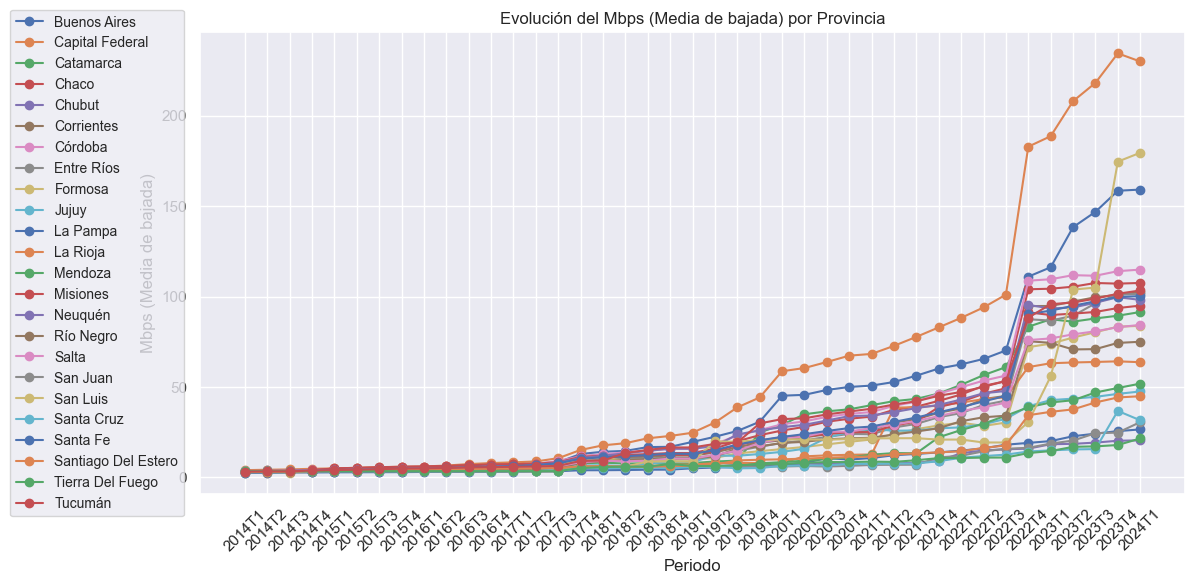

In [176]:
# Creación del gráfico de líneas
plt.figure(figsize=(12, 6))
for provincia in df_pivot.columns:
    plt.plot(df_pivot.index, df_pivot[provincia], marker='o', label=provincia)

# Personalización del gráfico:
plt.title('Evolución del Mbps (Media de bajada) por Provincia')
plt.xlabel('Periodo')
plt.ylabel('Mbps (Media de bajada)')
plt.legend(loc='center left', bbox_to_anchor=(-0.2, 0.5), fontsize='small')  # Leyenda vertical a la izquierda
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Se puede identificar ciertos puntos clave en los que la tendencia de la velocidad de internet cambia significativamente:

1. A partir del tercer trimestre de cada año, se observa un incremento en la velocidad de internet a nivel nacional.
2. El tercer trimestre de 2022 presenta el crecimiento mas significativo en la velocidad de internet a nivel nacional.
3. Entre el cuarto trimestre de 2019 y el primer trimestre de 2020, algunas provincias experimentan cambios notables.

La métrica de velocidad media de bajada es un indicador valioso para evaluar el desarrollo y las tendencias comerciales dentro del sector.

In [177]:
# Eliminemos la columna periodo

Velocidad_por_prov.drop(columns='Periodo', inplace=True)

### *Analisis Preliminar: Totales VMD*

In [178]:
Totales_VMD = pd.read_excel('Internet.xlsx', sheet_name=4)

Totales_VMD.info()
Totales_VMD.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Año                     41 non-null     int64  
 1   Trimestre               41 non-null     int64  
 2   Mbps (Media de bajada)  41 non-null     float64
 3   Trimestre.1             41 non-null     object 
dtypes: float64(1), int64(2), object(1)
memory usage: 1.4+ KB


Año  Trimestre  Mbps (Media de bajada)    Trimestre.1
0  2024          1                  139.15   Ene-Mar 2024
1  2023          4                  139.04   Oct-Dic 2023
2  2023          3                  129.67  Jul-Sept 2023
3  2023          2                  123.95   Abr-Jun 2023
4  2023          1                  110.50   Ene-Mar 2023

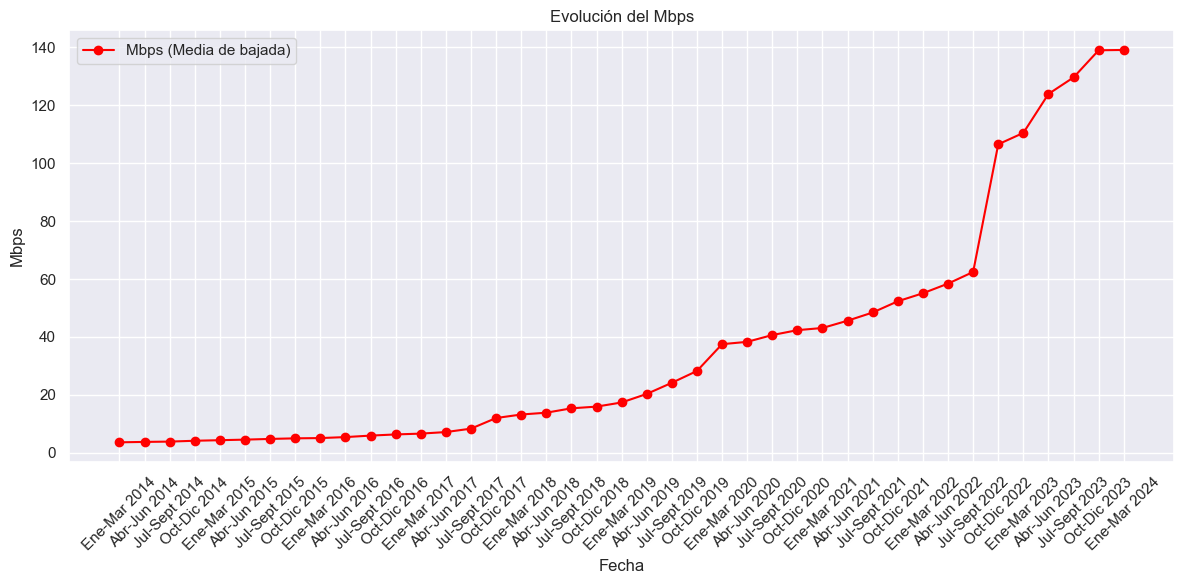

In [179]:
#  realicemos un gráfico de líneas que muestre la evolución de la velocidad de internet (en Mbps, media de bajada) 
# a lo largo del tiempo

# Invertir el orden del DataFrame:
Totales_VMD_invertido = Totales_VMD.iloc[::-1] #los datos esta ordenanos de manera descendente y queremos visualizarlo correctamente del mas antoguo al mas reciente. 

#Configuración de la figura:
plt.figure(figsize=(12, 6))
plt.plot(Totales_VMD_invertido['Trimestre.1'], Totales_VMD_invertido['Mbps (Media de bajada)'], marker='o', color='red', label='Mbps (Media de bajada)')

# Personalización del gráfico:
plt.title('Evolución del Mbps')
plt.xlabel('Fecha')
plt.ylabel('Mbps')
plt.legend(loc='upper left')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

los datos presentados en esta hoja y en esta grafica son esencialmente los mismos, e incluso más limitados que en la hoja anterior, ya que representan un promedio anual de la misma métrica

### * Analisis Preliminar : Totales Accesos Por Tecnología*

In [180]:
Totales_Accesos_Por_Tecnologia = pd.read_excel('Internet.xlsx', sheet_name=5)

Totales_Accesos_Por_Tecnologia.info()
Totales_Accesos_Por_Tecnologia.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Año           41 non-null     int64 
 1   Trimestre     41 non-null     int64 
 2   ADSL          41 non-null     int64 
 3   Cablemodem    41 non-null     int64 
 4   Fibra óptica  41 non-null     int64 
 5   Wireless      41 non-null     int64 
 6   Otros         41 non-null     int64 
 7   Total         41 non-null     int64 
 8   Periodo       41 non-null     object
dtypes: int64(8), object(1)
memory usage: 3.0+ KB


Año  Trimestre     ADSL  Cablemodem  Fibra óptica  Wireless   Otros  \
0  2024          1   774475     5986957       4015101    598682  257941   
1  2023          4   836390     6022532       3908183    585760  194796   
2  2023          3   897895     6018832       3708718    581436  200027   
3  2023          2  1006509     5997149       3463988    581823  202428   
4  2023          1  1204417     6002582       3243411    576647  214838   

      Total        Periodo  
0  11633156   Ene-Mar 2024  
1  11547661   Oct-Dic 2023  
2  11406908  Jul-Sept 2023  
3  11251897   Abr-Jun 2023  
4  11241895   Ene-Mar 2023

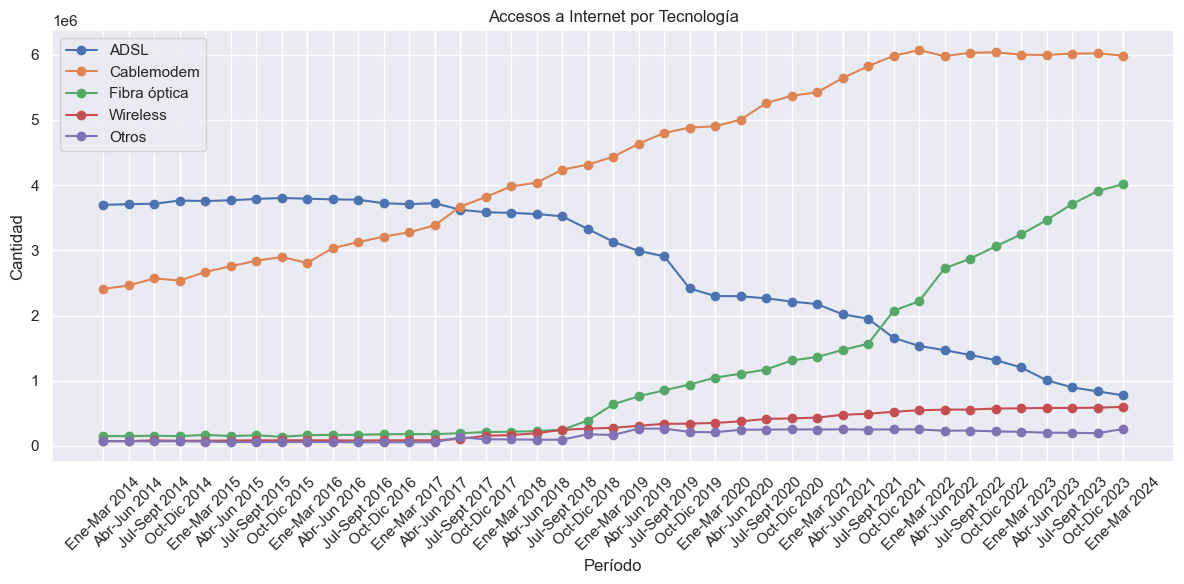

In [181]:
# Generemos un gráfico de líneas que muestra la evolución de los accesos a internet por diferentes tecnologías a lo largo del tiempo
#Inversión del DataFrame
Totales_Accesos_Por_Tecnologia_Invertido = Totales_Accesos_Por_Tecnologia.iloc[::-1]
#Definición de las columnas a graficar:
columnas_a_graficar = ['ADSL', 'Cablemodem', 'Fibra óptica', 'Wireless', 'Otros']
#Configuración de la figura:
plt.figure(figsize=(12, 6))
for columna in columnas_a_graficar:
    plt.plot(Totales_Accesos_Por_Tecnologia_Invertido['Periodo'], Totales_Accesos_Por_Tecnologia_Invertido[columna], marker='o', label=columna)

#Personalizacion del grafico: 
plt.title('Accesos a Internet por Tecnología')
plt.xlabel('Período')
plt.ylabel('Cantidad')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Con este grafico podemos analizar diferentes situaciones: 

1. Desde el 2017 se observa que el acceso por medio ADSL se redujo 
2. Desde el primer trimestre se observa como el acceso Cablemoden ha aumentado
3. El acceso Cablemoden se ha mantenido estable desde el ultimo trimestre del 2022
4. La conexion fibra optica viene en aumento desde el ultimo trimestre del 2018, sin embargo a tenido mayor crecimiento en los ultimos 3 años. 
5. Wireless y otras tecnoclgias no presentan cambios significativos. 

Esta informacion puede ofrecer perspectivas relevante sobre el desarrollo  nacional de algunas tecnologias 

### *Analisis preliminar : Accesos Por Tecnología*

In [182]:
Accesos_tecnologia = pd.read_excel('Internet.xlsx', sheet_name=6)

Accesos_tecnologia.info()
Accesos_tecnologia.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 986 entries, 0 to 985
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Año           985 non-null    object 
 1   Trimestre     985 non-null    object 
 2   Provincia     984 non-null    object 
 3   ADSL          984 non-null    float64
 4   Cablemodem    984 non-null    float64
 5   Fibra óptica  984 non-null    float64
 6   Wireless      984 non-null    float64
 7   Otros         984 non-null    float64
 8   Total         984 non-null    float64
dtypes: float64(6), object(3)
memory usage: 69.5+ KB


Año Trimestre        Provincia      ADSL  Cablemodem  Fibra óptica  \
0  2024         1     Buenos Aires  203297.0   2790663.0     1799013.0   
1  2024         1  Capital Federal   70108.0   1177475.0      203756.0   
2  2024         1        Catamarca    5901.0     11025.0       56542.0   
3  2024         1            Chaco   11343.0     58929.0       64463.0   
4  2024         1           Chubut   26306.0     77217.0       26356.0   

   Wireless     Otros      Total  
0  150290.0  101294.0  5044557.0  
1    4493.0   48879.0  1504711.0  
2    1384.0      81.0    74933.0  
3    8404.0   12404.0   155543.0  
4   30867.0    9930.0   170676.0

In [183]:
filas_con_nulos = Accesos_tecnologia[Accesos_tecnologia.isnull().any(axis=1)]
filas_con_nulos

Año  \
984  NaN   
985    *   

                                                                                                                              Trimestre  \
984                                                                                                                                 NaN   
985  Los datos provinciales no coinciden a nivel nacional, ya que se rincorporó información que no contien apertuta a nivel geográfico.   

    Provincia  ADSL  Cablemodem  Fibra óptica  Wireless  Otros  Total  
984       NaN   NaN         NaN           NaN       NaN    NaN    NaN  
985       NaN   NaN         NaN           NaN       NaN    NaN    NaN

Se identificaron dos filas vacías que no contienen datos útiles. Además, las columnas 'Año' y 'Trimestre' presentan errores de formato. También se observa que la columna 'Total' es innecesaria, ya que es el resultado de la suma de las demás columnas. Sería recomendable eliminarla para evitar la redundancia en los datos.

In [184]:
# Eliminación de filas con valores nulos
Accesos_tecnologia.dropna(inplace=True)

#Funcion de limpieza para convertir * a numeros 
def asteriscos_a_numeros(valor):
    return int(valor.replace('*', ''))

#  Conversión de la columna 'Año' y aplicación de la función de limpieza
Accesos_tecnologia['Año'] = Accesos_tecnologia['Año'].astype(str).apply(asteriscos_a_numeros)

#Conversión de la columna 'Trimestre' y aplicación de la función de limpieza
Accesos_tecnologia['Trimestre'] = Accesos_tecnologia['Trimestre'].astype(str).apply(asteriscos_a_numeros)


In [185]:
#Observemos los cambios: 
Accesos_tecnologia.info()
Accesos_tecnologia.head()

<class 'pandas.core.frame.DataFrame'>
Index: 984 entries, 0 to 983
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Año           984 non-null    int64  
 1   Trimestre     984 non-null    int64  
 2   Provincia     984 non-null    object 
 3   ADSL          984 non-null    float64
 4   Cablemodem    984 non-null    float64
 5   Fibra óptica  984 non-null    float64
 6   Wireless      984 non-null    float64
 7   Otros         984 non-null    float64
 8   Total         984 non-null    float64
dtypes: float64(6), int64(2), object(1)
memory usage: 76.9+ KB


Año  Trimestre        Provincia      ADSL  Cablemodem  Fibra óptica  \
0  2024          1     Buenos Aires  203297.0   2790663.0     1799013.0   
1  2024          1  Capital Federal   70108.0   1177475.0      203756.0   
2  2024          1        Catamarca    5901.0     11025.0       56542.0   
3  2024          1            Chaco   11343.0     58929.0       64463.0   
4  2024          1           Chubut   26306.0     77217.0       26356.0   

   Wireless     Otros      Total  
0  150290.0  101294.0  5044557.0  
1    4493.0   48879.0  1504711.0  
2    1384.0      81.0    74933.0  
3    8404.0   12404.0   155543.0  
4   30867.0    9930.0   170676.0

Esta hoja proporciona información comparable a la anterior, pero añade el detalle desglosado por provincia, manteniendo la integridad de los datos

### *Analisis Preliminar: Penetración en Población*

In [186]:
Penetracion_poblacion = pd.read_excel('Internet.xlsx', sheet_name=7)

Penetracion_poblacion.info()
Penetracion_poblacion.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 984 entries, 0 to 983
Data columns (total 4 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Año                       984 non-null    int64  
 1   Trimestre                 984 non-null    int64  
 2   Provincia                 984 non-null    object 
 3   Accesos por cada 100 hab  984 non-null    float64
dtypes: float64(1), int64(2), object(1)
memory usage: 30.9+ KB


Año  Trimestre        Provincia  Accesos por cada 100 hab
0  2024          1     Buenos Aires                     27.80
1  2024          1  Capital Federal                     48.78
2  2024          1        Catamarca                     17.50
3  2024          1            Chaco                     12.48
4  2024          1           Chubut                     26.02

Los datos se encuentras en correcto estado para el analisis 

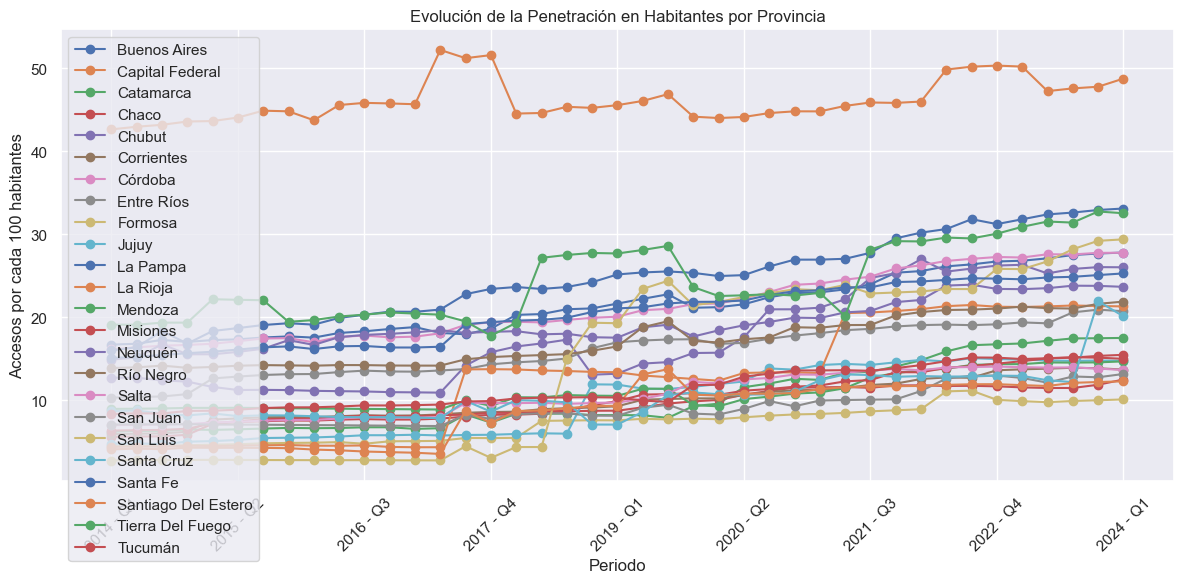

In [187]:
# Crear columna 'Periodo' combinando 'Año' y 'Trimestre'
Penetracion_poblacion['Periodo'] = Penetracion_poblacion['Año'].astype(str) + ' - Q' + Penetracion_poblacion['Trimestre'].astype(str)

# Crear tabla pivot
df_pivot = Penetracion_poblacion.pivot(index='Periodo', columns='Provincia', values='Accesos por cada 100 hab')

# Configurar la figura del gráfico
plt.figure(figsize=(12, 6))

# Graficar las provincias
df_pivot.plot(ax=plt.gca(), marker='o', legend=False)

# Ajustar el gráfico
plt.title('Evolución de la Penetración en Habitantes por Provincia')
plt.xlabel('Periodo')
plt.ylabel('Accesos por cada 100 habitantes')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

# Mostrar la leyenda dentro del gráfico
plt.legend(loc='upper left')
plt.show()


Se logra observar:

1. Capital se encuentra en la vanguardia de la penetración por persona.
2. La Pampa y Tierra del Fuego lo siguen de cerca.
3. San Luis ha tenido un crecimiento muy significativo de último a ocupar el cuarto lugar.

### *Analisis Preliminar: Penetracion en Hogares*

In [188]:
Penetracion_hogares = pd.read_excel('Internet.xlsx', sheet_name=8)

Penetracion_hogares.info()
Penetracion_hogares.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 984 entries, 0 to 983
Data columns (total 4 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Año                           984 non-null    int64  
 1   Trimestre                     984 non-null    int64  
 2   Provincia                     984 non-null    object 
 3   Accesos por cada 100 hogares  984 non-null    float64
dtypes: float64(1), int64(2), object(1)
memory usage: 30.9+ KB


Año  Trimestre        Provincia  Accesos por cada 100 hogares
0  2024          1     Buenos Aires                         81.10
1  2024          1  Capital Federal                        119.53
2  2024          1        Catamarca                         68.82
3  2024          1            Chaco                         46.70
4  2024          1           Chubut                         84.89

Al igual que en Penetracion en poblacion, esta hoja contiene una columna muy relevante dentro de la base de datos: 'Accesos por cada 100 hogares'. La columna trae una forma clara y quantificable de observar el progreso (o falta de este) a travez del tiempo en cada provincia.

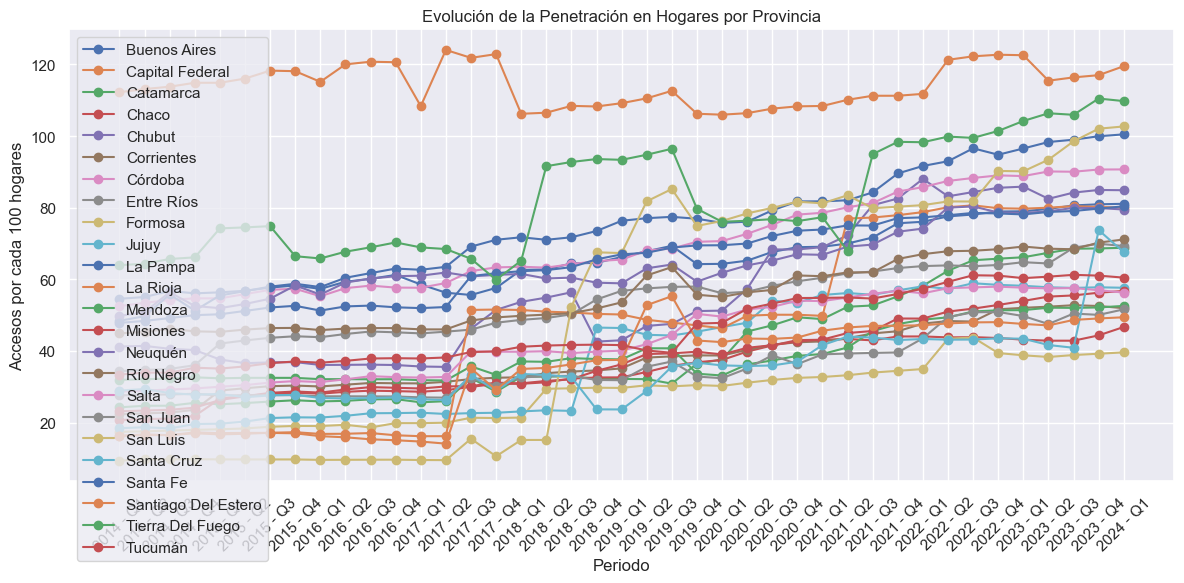

In [189]:
# Crear columna 'Periodo' combinando Año y Trimestre
Penetracion_hogares['Periodo'] = Penetracion_hogares['Año'].astype(str) + ' - Q' + Penetracion_hogares['Trimestre'].astype(str)

# Crear tabla pivot
df_pivot = Penetracion_hogares.pivot(index='Periodo', columns='Provincia', values='Accesos por cada 100 hogares')

# Configurar la figura del gráfico
plt.figure(figsize=(12, 6))

# Trazar líneas sin etiquetas de datos
for provincia in df_pivot.columns:
    plt.plot(df_pivot.index, df_pivot[provincia], marker='o', label=provincia)

# Configuración del gráfico
plt.title('Evolución de la Penetración en Hogares por Provincia')
plt.xlabel('Periodo')
plt.ylabel('Accesos por cada 100 hogares')
plt.grid(True)
plt.xticks(rotation=45)

# Mantener la leyenda dentro del gráfico
plt.legend(loc='upper left')
plt.tight_layout()

# Mostrar el gráfico
plt.show()


De este grafico tenemos 2 puntos importantes: 

1. Capital Federal y Tierra del Fuego tienen el mayor nivelpenetración en hogares relativamente y an permanecido a lo largo de los años.
2. San Luis presento el crecimeinto mas importante, paso de ser la provicia con menos penetracio en hogares a ocupar el 3 lugar.

### *Analisis Peliminar: Penetracion-totales*

In [190]:
Penetracion_totales= pd.read_excel('Internet.xlsx', sheet_name=9)

Penetracion_totales.info()
Penetracion_totales.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Año                           41 non-null     int64  
 1   Trimestre                     41 non-null     int64  
 2   Accesos por cada 100 hogares  41 non-null     float64
 3   Accesos por cada 100 hab      41 non-null     float64
 4   Periodo                       41 non-null     object 
dtypes: float64(2), int64(2), object(1)
memory usage: 1.7+ KB


Año  Trimestre  Accesos por cada 100 hogares  Accesos por cada 100 hab  \
0  2024          1                         78.89                     24.79   
1  2023          4                         78.56                     24.66   
2  2023          3                         77.84                     24.41   
3  2023          2                         77.02                     24.14   
4  2023          1                         77.20                     24.17   

         Periodo  
0   Ene-Mar 2024  
1   Oct-Dic 2023  
2  Jul-Sept 2023  
3   Abr-Jun 2023  
4   Ene-Mar 2023

<function matplotlib.pyplot.show(close=None, block=None)>

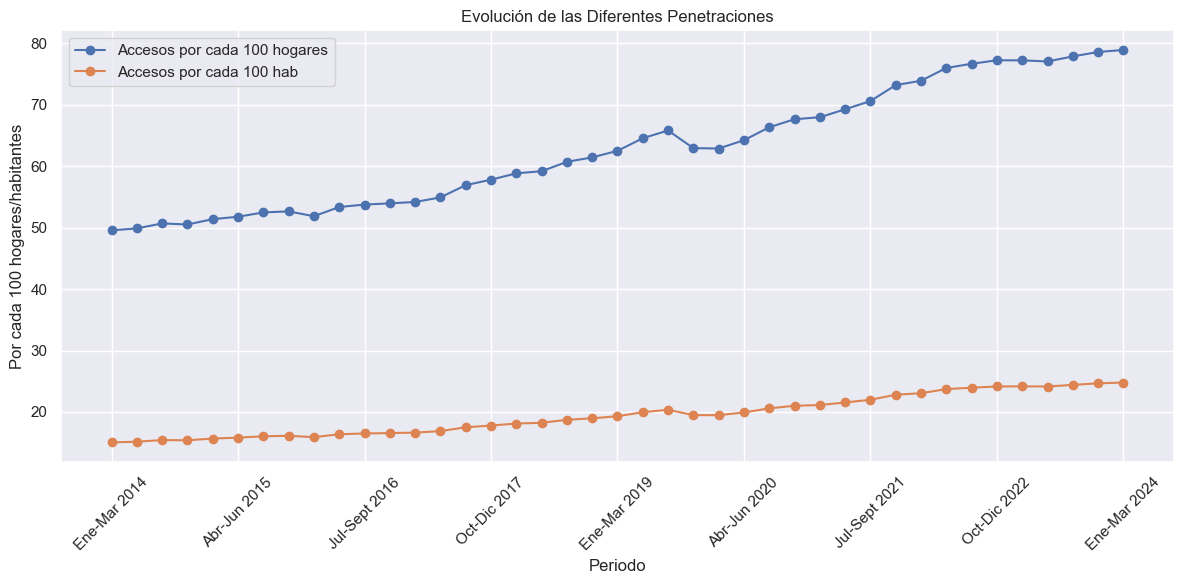

In [191]:
# Invertir el DataFrame
df_Penetracion_totales_invertido = Penetracion_totales.iloc[::-1]

# Crear la figura y los ejes
plt.figure(figsize=(12, 6))

# Graficar ambas series en un solo paso
df_Penetracion_totales_invertido.plot(x='Periodo', 
                                      y=['Accesos por cada 100 hogares', 'Accesos por cada 100 hab'], 
                                      marker='o', ax=plt.gca())

# Ajustes de etiquetas, leyenda y apariencia
plt.title('Evolución de las Diferentes Penetraciones')
plt.xlabel('Periodo')
plt.ylabel('Por cada 100 hogares/habitantes')
plt.legend(loc='upper left')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

# Mostrar gráfico
plt.show


El análisis del gráfico revela lo siguiente:

1. La penetración en hogares es mayor que la penetración en población, lo cual es coherente, dado que en promedio hay más personas por hogar según el tamaño de las familias.
2. Un aumento constante en ambas métricas de penetración a lo largo del tiempo.
3. Una disminución entre los periodos de abril-junio de 2019 y octubre-diciembre de 2019.


### *Analisis Preliminar: Totales Accesos por velocidad*

In [192]:
Totales_Accesos_por_velocidad= pd.read_excel('Internet.xlsx', sheet_name=10)

Totales_Accesos_por_velocidad.info()
Totales_Accesos_por_velocidad.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Año                      41 non-null     int64
 1   Trimestre                41 non-null     int64
 2   Hasta 512 kbps           41 non-null     int64
 3   Entre 512 Kbps y 1 Mbps  41 non-null     int64
 4   Entre 1 Mbps y 6 Mbps    41 non-null     int64
 5   Entre 6 Mbps y 10 Mbps   41 non-null     int64
 6   Entre 10 Mbps y 20 Mbps  41 non-null     int64
 7   Entre 20 Mbps y 30 Mbps  41 non-null     int64
 8   Más de 30 Mbps           41 non-null     int64
 9   OTROS                    41 non-null     int64
 10  Total                    41 non-null     int64
dtypes: int64(11)
memory usage: 3.7 KB


Año  Trimestre  Hasta 512 kbps  Entre 512 Kbps y 1 Mbps  \
0  2024          1           28801                    69355   
1  2023          4           29708                    71742   
2  2023          3           30274                    80609   
3  2023          2           30827                    79405   
4  2023          1           31437                    82048   

   Entre 1 Mbps y 6 Mbps  Entre 6 Mbps y 10 Mbps  Entre 10 Mbps y 20 Mbps  \
0                 866152                  950930                   672155   
1                 900253                  978108                   697232   
2                 945608                  998725                   720084   
3                 963510                 1028250                   734125   
4                1001553                 1060321                   729194   

   Entre 20 Mbps y 30 Mbps  Más de 30 Mbps   OTROS     Total  
0                   353896         8363694  328173  11633156  
1                   350290         8224736  295592  11547661  
2                   350918         8003269  277421  11406908  
3                   364730         7775095  275955  11251897  
4                   357769         7564819  414754  11241895

generaremos una gráfica que muestra la evolución de los accesos a internet según diferentes rangos de velocidad en distintos trimestres

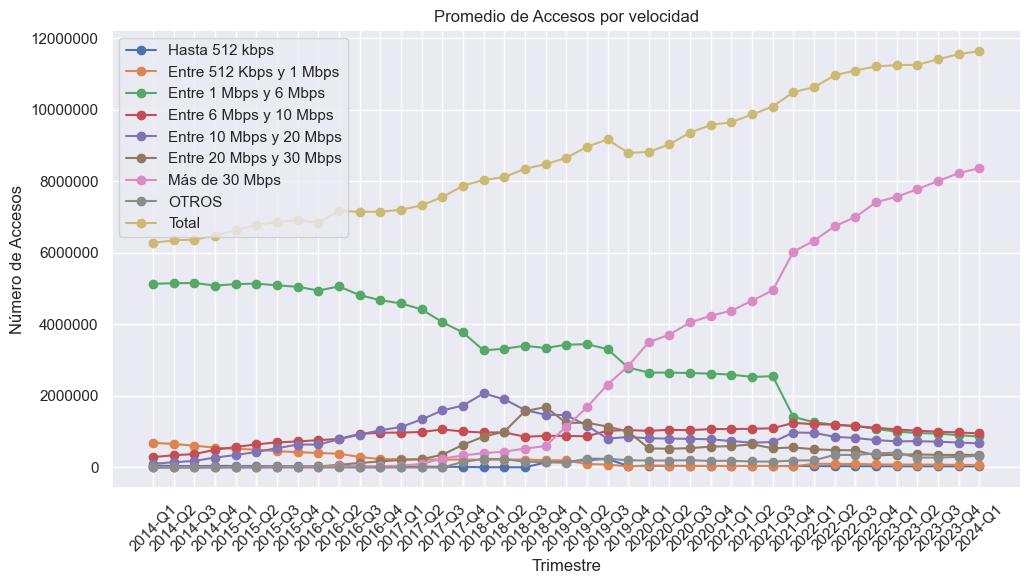

In [193]:
# Invertir el DataFrame
Totales_Accesos_por_velocidad_invertido = Totales_Accesos_por_velocidad.iloc[::-1]

# Crear el gráfico
plt.figure(figsize=(10, 6))

# Definir las columnas que representan los rangos de velocidad
columnas_velocidad = [
    'Hasta 512 kbps', 'Entre 512 Kbps y 1 Mbps', 'Entre 1 Mbps y 6 Mbps', 
    'Entre 6 Mbps y 10 Mbps', 'Entre 10 Mbps y 20 Mbps', 'Entre 20 Mbps y 30 Mbps', 
    'Más de 30 Mbps', 'OTROS', 'Total'
]

# Generar las líneas de la gráfica iterativamente
for columna in columnas_velocidad:
    plt.plot(
        Totales_Accesos_por_velocidad_invertido['Año'].astype(str) + '-Q' + 
        Totales_Accesos_por_velocidad_invertido['Trimestre'].astype(str),
        Totales_Accesos_por_velocidad_invertido[columna], 
        marker='o', label=columna
    )

# Ajustes estéticos
plt.title('Promedio de Accesos por velocidad')
plt.xlabel('Trimestre')
plt.ylabel('Número de Accesos')
plt.grid(True)
plt.xticks(rotation=45)
plt.legend(loc='upper left')
plt.tight_layout()

# Formatear el eje Y para mostrar solo números enteros
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: '{:.0f}'.format(x)))

# Mostrar el gráfico
plt.show()


Se observa una disminución en los accesos con velocidades entre 1 y 6 Mbps, acompañada por un incremento significativo en los accesos de más de 30 Mbps, mientras que el total de accesos continúa en ascenso. Esto sugiere una posible correlación entre la mejora en la velocidad de conexión y el crecimiento general de accesos.

### *Analisis Preliminar: Accesos por Velocidad*

In [194]:
Accesos_por_velocidad= pd.read_excel('Internet.xlsx', sheet_name=11)

Accesos_por_velocidad.info()
Accesos_por_velocidad.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 984 entries, 0 to 983
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Año                  984 non-null    int64  
 1   Trimestre            984 non-null    int64  
 2   Provincia            984 non-null    object 
 3   HASTA 512 kbps       984 non-null    float64
 4   + 512 Kbps - 1 Mbps  984 non-null    float64
 5   + 1 Mbps - 6 Mbps    984 non-null    float64
 6   + 6 Mbps - 10 Mbps   984 non-null    float64
 7   + 10 Mbps - 20 Mbps  984 non-null    float64
 8   + 20 Mbps - 30 Mbps  984 non-null    float64
 9   + 30 Mbps            984 non-null    float64
 10  OTROS                978 non-null    float64
 11  Total                984 non-null    float64
dtypes: float64(9), int64(2), object(1)
memory usage: 92.4+ KB


Año  Trimestre        Provincia  HASTA 512 kbps  + 512 Kbps - 1 Mbps  \
0  2024          1     Buenos Aires         26002.0              22510.0   
1  2024          1  Capital Federal           516.0               5418.0   
2  2024          1        Catamarca            71.0                176.0   
3  2024          1            Chaco           236.0                416.0   
4  2024          1           Chubut           111.0               1083.0   

   + 1 Mbps - 6 Mbps  + 6 Mbps - 10 Mbps  + 10 Mbps - 20 Mbps  \
0           221185.0            233225.0             241778.0   
1            29753.0             51415.0              37369.0   
2             2872.0              3424.0               4204.0   
3            14156.0              9044.0               5533.0   
4            43828.0             31885.0              23024.0   

   + 20 Mbps - 30 Mbps  + 30 Mbps     OTROS      Total  
0             106418.0  4068292.0  125147.0  5044557.0  
1               5957.0  1374283.0       0.0  1504711.0  
2               1822.0    62294.0      70.0    74933.0  
3               5718.0   116624.0    3816.0   155543.0  
4              20261.0    33844.0   16640.0   170676.0

In [195]:
filas_con_nulos = Accesos_por_velocidad[Accesos_por_velocidad.isnull().any(axis=1)]
filas_con_nulos

Año  Trimestre         Provincia  HASTA 512 kbps  + 512 Kbps - 1 Mbps  \
457  2019          2   Capital Federal            74.0               1027.0   
467  2019          2          La Rioja             9.0                 11.0   
468  2019          2           Mendoza            20.0               2522.0   
475  2019          2        Santa Cruz            25.0                 84.0   
478  2019          2  Tierra Del Fuego             6.0                123.0   
479  2019          2           Tucumán            16.0                157.0   

     + 1 Mbps - 6 Mbps  + 6 Mbps - 10 Mbps  + 10 Mbps - 20 Mbps  \
457           281370.0            124087.0             239691.0   
467            39819.0              4297.0               4857.0   
468           205165.0              2971.0              10092.0   
475            24861.0              3806.0               1202.0   
478            41824.0              4241.0               1573.0   
479            78891.0             44296.0              24291.0   

     + 20 Mbps - 30 Mbps  + 30 Mbps  OTROS      Total  
457             296155.0   475991.0    NaN  1418395.0  
467                 13.0     1298.0    NaN    50304.0  
468               1256.0      234.0    NaN   222260.0  
475                 28.0        4.0    NaN    30010.0  
478                 96.0       32.0    NaN    47895.0  
479                628.0    18394.0    NaN   166673.0

Observando los valores es posible llenarlos con 0

In [196]:
# Rellenar valores faltantes con 0 
Accesos_por_velocidad.fillna(0, inplace=True)


In [197]:
# Imprimir conteo de valores únicos de la columna 'Año'
print(Accesos_por_velocidad['Año'].value_counts())

# Mostrar información de ambos DataFrames
for df in [Totales_Accesos_por_velocidad, Accesos_por_velocidad]:
    df.info()

# Vista previa de las primeras filas del DataFrame df_Accesos_por_velocidad
Accesos_por_velocidad.head()

Año
2022    96
2020    96
2021    96
2017    96
2016    96
2019    96
2018    96
2015    96
2014    96
2023    72
2024    48
Name: count, dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Año                      41 non-null     int64
 1   Trimestre                41 non-null     int64
 2   Hasta 512 kbps           41 non-null     int64
 3   Entre 512 Kbps y 1 Mbps  41 non-null     int64
 4   Entre 1 Mbps y 6 Mbps    41 non-null     int64
 5   Entre 6 Mbps y 10 Mbps   41 non-null     int64
 6   Entre 10 Mbps y 20 Mbps  41 non-null     int64
 7   Entre 20 Mbps y 30 Mbps  41 non-null     int64
 8   Más de 30 Mbps           41 non-null     int64
 9   OTROS                    41 non-null     int64
 10  Total                    41 non-null     int64
dtypes: int64(11)
memory usage: 3.7 KB
<class 'pandas.core.frame.DataF

Año  Trimestre        Provincia  HASTA 512 kbps  + 512 Kbps - 1 Mbps  \
0  2024          1     Buenos Aires         26002.0              22510.0   
1  2024          1  Capital Federal           516.0               5418.0   
2  2024          1        Catamarca            71.0                176.0   
3  2024          1            Chaco           236.0                416.0   
4  2024          1           Chubut           111.0               1083.0   

   + 1 Mbps - 6 Mbps  + 6 Mbps - 10 Mbps  + 10 Mbps - 20 Mbps  \
0           221185.0            233225.0             241778.0   
1            29753.0             51415.0              37369.0   
2             2872.0              3424.0               4204.0   
3            14156.0              9044.0               5533.0   
4            43828.0             31885.0              23024.0   

   + 20 Mbps - 30 Mbps  + 30 Mbps     OTROS      Total  
0             106418.0  4068292.0  125147.0  5044557.0  
1               5957.0  1374283.0       0.0  1504711.0  
2               1822.0    62294.0      70.0    74933.0  
3               5718.0   116624.0    3816.0   155543.0  
4              20261.0    33844.0   16640.0   170676.0

La hoja presenta similitudes con la anterior, pero proporciona mas detalles de datos, organizándolos por provincias.

### *Analisis Preliminar: Dial-BAf*

In [198]:
Dial_BAf= pd.read_excel('Internet.xlsx', sheet_name=12)

Dial_BAf.info()
Dial_BAf.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 984 entries, 0 to 983
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Año               984 non-null    int64  
 1   Trimestre         984 non-null    int64  
 2   Provincia         984 non-null    object 
 3   Banda ancha fija  984 non-null    int64  
 4   Dial up           982 non-null    float64
 5   Total             984 non-null    int64  
dtypes: float64(1), int64(4), object(1)
memory usage: 46.3+ KB


Año  Trimestre        Provincia  Banda ancha fija  Dial up    Total
0  2024          1     Buenos Aires           5038657   5900.0  5044557
1  2024          1  Capital Federal           1502661   2050.0  1504711
2  2024          1        Catamarca             74932      1.0    74933
3  2024          1            Chaco            155538      5.0   155543
4  2024          1           Chubut            169819    857.0   170676

Revisemos valores nulos

In [199]:
filas_con_nulos = Dial_BAf[Dial_BAf.isnull().any(axis=1)]
filas_con_nulos

Año  Trimestre Provincia  Banda ancha fija  Dial up   Total
560  2018          2   Formosa             44554      NaN   44554
565  2018          2  Misiones            106147      NaN  106147

In [200]:
Dial_BAf = Dial_BAf.fillna(0)

Dial_BAf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 984 entries, 0 to 983
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Año               984 non-null    int64  
 1   Trimestre         984 non-null    int64  
 2   Provincia         984 non-null    object 
 3   Banda ancha fija  984 non-null    int64  
 4   Dial up           984 non-null    float64
 5   Total             984 non-null    int64  
dtypes: float64(1), int64(4), object(1)
memory usage: 46.3+ KB


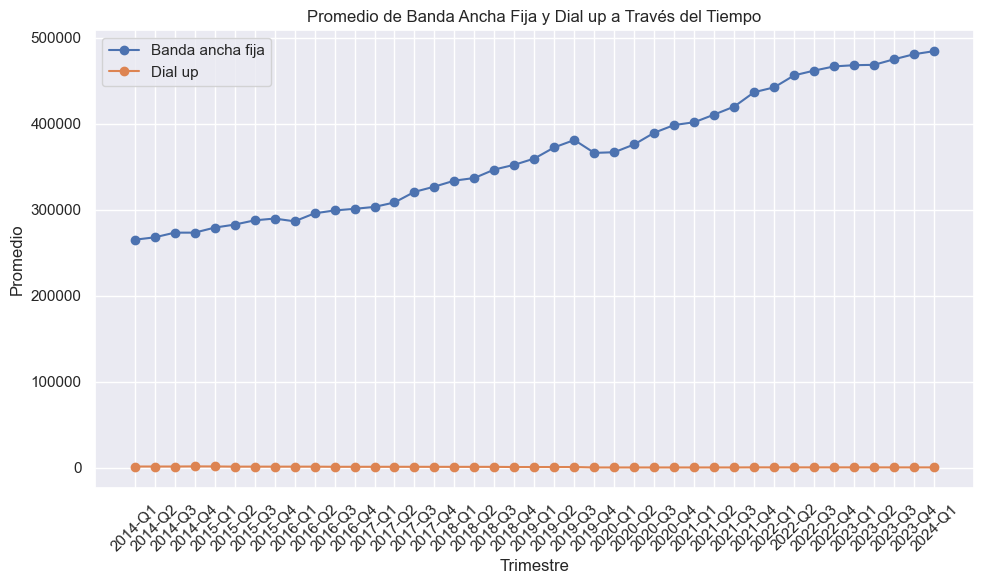

In [201]:
# Agrupando por 'Año' y 'Trimestre' y calculando el promedio de las métricas
promedio = Dial_BAf.groupby(['Año', 'Trimestre'])[['Banda ancha fija', 'Dial up']].mean().reset_index()

# Creando la columna 'Periodo' para el eje x
promedio['Periodo'] = promedio['Año'].astype(str) + '-Q' + promedio['Trimestre'].astype(str)

# Configuración de la figura y gráficos
plt.figure(figsize=(10, 6))
for column in ['Banda ancha fija', 'Dial up']:
    plt.plot(promedio['Periodo'], promedio[column], marker='o', label=column)

# Añadiendo títulos y etiquetas
plt.title('Promedio de Banda Ancha Fija y Dial up a Través del Tiempo')
plt.xlabel('Trimestre')
plt.ylabel('Promedio')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


A partir de los datos analizados, se pueden realizar las siguientes observaciones:

Comparativa con Dial Up: La cantidad de usuarios de servicios Dial Up es prácticamente irrelevante en comparación con el acceso a banda ancha.

Crecimiento de la Banda Ancha: Se ha observado un crecimiento constante en el acceso a servicios de banda ancha a lo largo del período evaluado.

Variación en Accesos: Se identifica una única disminución en la cantidad de accesos, que tuvo lugar entre el segundo y el tercer trimestre de 2019.

### *Analisis Preliminar: Totales Dial-BAf*

In [202]:
Totales_Dial_BAf= pd.read_excel('Internet.xlsx', sheet_name=13)

Totales_Dial_BAf.info()
Totales_Dial_BAf.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Año               41 non-null     int64 
 1   Trimestre         41 non-null     int64 
 2   Banda ancha fija  41 non-null     int64 
 3   Dial up           41 non-null     int64 
 4   Total             41 non-null     int64 
 5   Periodo           41 non-null     object
dtypes: int64(5), object(1)
memory usage: 2.1+ KB


Año  Trimestre  Banda ancha fija  Dial up     Total        Periodo
0  2024          1          11621363    11793  11633156   Ene-Mar 2024
1  2023          4          11535868    11793  11547661   Oct-Dic 2023
2  2023          3          11395115    11793  11406908  Jul-Sept 2023
3  2023          2          11239781    12116  11251897   Abr-Jun 2023
4  2023          1          11229459    12436  11241895   Ene-Mar 2023

Esta hoja contiene valores muy similares a lo analizados anteriomente

### *Analisis Preliminar: Ingresos*

In [203]:
Ingresos= pd.read_excel('Internet.xlsx', sheet_name=14)

Ingresos.info()
Ingresos.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 4 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Año                        41 non-null     int64  
 1   Trimestre                  41 non-null     int64  
 2   Ingresos (miles de pesos)  41 non-null     float64
 3   Periodo                    41 non-null     object 
dtypes: float64(1), int64(2), object(1)
memory usage: 1.4+ KB


Año  Trimestre  Ingresos (miles de pesos)        Periodo
0  2024          1               2.804191e+08   Ene-Mar 2024
1  2023          4               1.673760e+08   Oct-Dic 2023
2  2023          3               1.331066e+08  Jul-Sept 2023
3  2023          2               1.180603e+08   Jun-Mar 2023
4  2033          1               1.041350e+08   Ene-Mar 2023

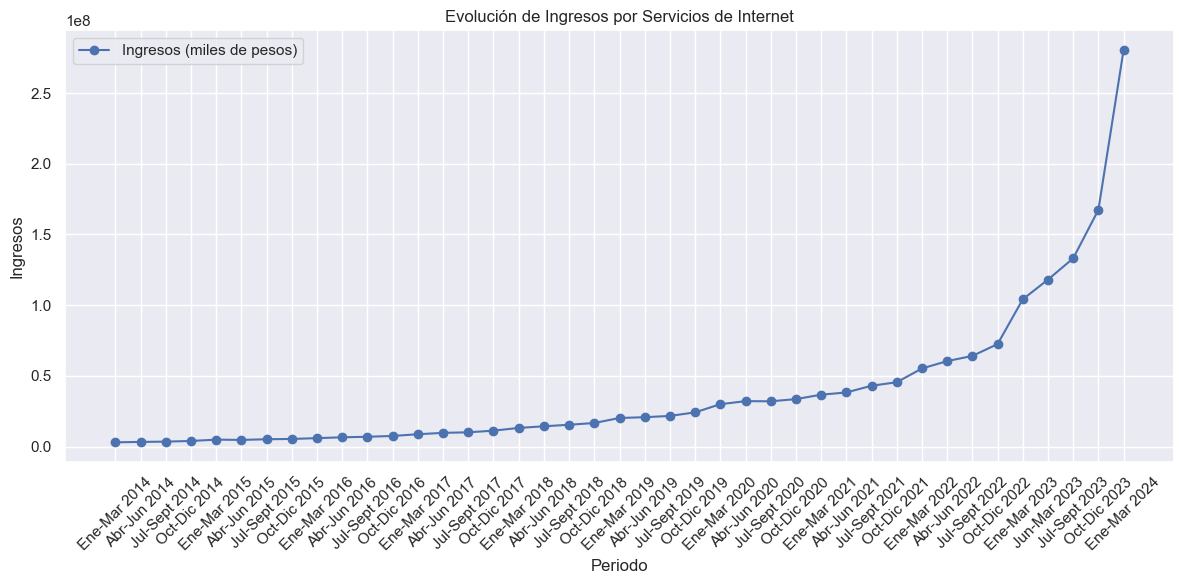

In [204]:
# Invertir el DataFrame de ingresos
Ingresos_invertido = Ingresos.iloc[::-1]

# Configurar la figura
plt.figure(figsize=(12, 6))

# Graficar los ingresos
plt.plot(Ingresos_invertido['Periodo'], 
         Ingresos_invertido['Ingresos (miles de pesos)'], 
         marker='o', 
         label='Ingresos (miles de pesos)')

# Configurar títulos y etiquetas
plt.title('Evolución de Ingresos por Servicios de Internet')
plt.xlabel('Periodo')
plt.ylabel('Ingresos')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend()  # Agregar leyenda si es necesario

# Mostrar la gráfica
plt.show()


Se ha observado un notable incremento en los ingresos generados por los servicios de internet, lo cual es coherente con el aumento en la cantidad de accesos y la mejora en la velocidad de conexión.

#### Unificamos los datos que consideramos valiosos en una sola tabla:

- Velocidad % por prov 
- Accesos Por Tecnología
- Penetración-poblacion
- Penetracion-hogares
- Accesos por velocidad
- Dial-BAf


In [205]:
df = pd.merge(Velocidad_por_prov, Accesos_tecnologia.rename(columns={'Otros':'Otras Tecnologias'}), 
               on=['Año', 'Trimestre', 'Provincia'], how='inner')

df = pd.merge(df, Penetracion_poblacion.drop(columns='Periodo'), 
               on=['Año', 'Trimestre', 'Provincia'], how='left')

df = pd.merge(df, Penetracion_hogares, 
               on=['Año', 'Trimestre', 'Provincia'], how='left')

df = pd.merge(df, Accesos_por_velocidad.drop(columns='Total').rename(columns={'OTROS':'Otras Velocidades'}), 
               on=['Año', 'Trimestre', 'Provincia'], how='left')

df = pd.merge(df, Dial_BAf.drop(columns='Total'), 
               on=['Año', 'Trimestre', 'Provincia'], how='left')

# Crear la columna 'Periodo'
df['Periodo'] = df['Año'].astype(str) + ' - Q' + df['Trimestre'].astype(str)

# Rotar para que queden las primeras fechas primero (facilitar gráficos)
df = df[::-1]

df


Año  Trimestre            Provincia  Mbps (Media de bajada)      ADSL  \
983  2014          1              Tucumán                3.208342  129717.0   
982  2014          1     Tierra Del Fuego                3.446888   21618.0   
981  2014          1  Santiago Del Estero                2.949472   32567.0   
980  2014          1             Santa Fe                3.147407  322662.0   
979  2014          1           Santa Cruz                3.315991   18927.0   
..    ...        ...                  ...                     ...       ...   
4    2024          1               Chubut               20.500000   26306.0   
3    2024          1                Chaco              107.510000   11343.0   
2    2024          1            Catamarca               91.450000    5901.0   
1    2024          1      Capital Federal              229.940000   70108.0   
0    2024          1         Buenos Aires              159.130000  203297.0   

     Cablemodem  Fibra óptica  Wireless  Otras Tecnologias      Total  ...  \
983        83.0         121.0      13.0               98.0   130032.0  ...   
982      2837.0         648.0       1.0             2934.0    28038.0  ...   
981      3598.0          19.0     915.0               34.0    37133.0  ...   
980    174296.0        3059.0    5951.0              644.0   506612.0  ...   
979       100.0         381.0    4092.0             3264.0    26764.0  ...   
..          ...           ...       ...                ...        ...  ...   
4       77217.0       26356.0   30867.0             9930.0   170676.0  ...   
3       58929.0       64463.0    8404.0            12404.0   155543.0  ...   
2       11025.0       56542.0    1384.0               81.0    74933.0  ...   
1     1177475.0      203756.0    4493.0            48879.0  1504711.0  ...   
0     2790663.0     1799013.0  150290.0           101294.0  5044557.0  ...   

     HASTA 512 kbps  + 512 Kbps - 1 Mbps + 1 Mbps - 6 Mbps  \
983             6.0              34672.0           83210.0   
982            12.0                607.0           30902.0   
981          1234.0              10531.0           22817.0   
980          8456.0             124468.0          345225.0   
979           161.0               1625.0           24972.0   
..              ...                  ...               ...   
4             111.0               1083.0           43828.0   
3             236.0                416.0           14156.0   
2              71.0                176.0            2872.0   
1             516.0               5418.0           29753.0   
0           26002.0              22510.0          221185.0   

     + 6 Mbps - 10 Mbps  + 10 Mbps - 20 Mbps  + 20 Mbps - 30 Mbps  + 30 Mbps  \
983             11779.0                362.0                  3.0        0.0   
982                 6.0                  0.0                  0.0        0.0   
981              2422.0                109.0                  0.0        0.0   
980             20328.0               6845.0                 23.0      668.0   
979                 1.0                  1.0                  0.0        0.0   
..                  ...                  ...                  ...        ...   
4               31885.0              23024.0              20261.0    33844.0   
3                9044.0               5533.0               5718.0   116624.0   
2                3424.0               4204.0               1822.0    62294.0   
1               51415.0              37369.0               5957.0  1374283.0   
0              233225.0             241778.0             106418.0  4068292.0   

     Otras Velocidades  Banda ancha fija  Dial up  
983                0.0            129944     88.0  
982                0.0             27272    766.0  
981                0.0             37124      9.0  
980                0.0            506000    612.0  
979                0.0             26304    460.0  
..                 ...               ...      ...  
4              16640.0            169819    857.0 

Creamos una tabla que muestra la evolución del tipo de cambio del peso argentino (ARS) frente al dólar estadounidense (USD) desde 2014 hasta 2024:

In [206]:
import pandas as pd

datos_dolar = {
    'Año': [2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024],
    'Tipo de Cambio (ARS/USD)': [8.0, 9.0, 14.9, 16.6, 29.9, 63.0, 84.0, 97.0, 185.0, 358.0, 861.0]
}

# Convertirlo en un DataFrame correctamente
datos_dolar = pd.DataFrame(datos_dolar)

# Verificamos que las columnas son correctas
print(datos_dolar.head())


    Año  Tipo de Cambio (ARS/USD)
0  2014                       8.0
1  2015                       9.0
2  2016                      14.9
3  2017                      16.6
4  2018                      29.9


Estos valores son estimaciones y pueden variar según la fuente consultada. Durante este período, se ha observado una tendencia de devaluación significativa del peso argentino, especialmente a partir de 2018, que ha llevado a una creciente preocupación sobre la economía del país​(Wise)​(Investing.com).

In [207]:
# Aseguramos que datos_dolar sea un DataFrame si es un diccionario
if isinstance(datos_dolar, dict):
    datos_dolar = pd.DataFrame(list(datos_dolar.items()), columns=['Año', 'Tipo de Cambio (ARS/USD)'])

# Aseguramos que ambas columnas 'Año' sean del mismo tipo (string) en ambas tablas
Ingresos['Año'] = Ingresos['Año'].astype(str).str.strip()  # Elimina espacios en blanco
datos_dolar['Año'] = datos_dolar['Año'].astype(str).str.strip()

# Verificamos si hay valores únicos en 'Año' de cada tabla
print("Valores únicos en Ingresos (Año):", Ingresos['Año'].unique())
print("Valores únicos en datos_dolar (Año):", datos_dolar['Año'].unique())

# Hacemos el merge entre ambas tablas utilizando la columna 'Año'
df_resultado = pd.merge(Ingresos, datos_dolar, on='Año', how='inner')

# Si el merge sigue sin resultados, podemos mostrar qué valores no coinciden
if df_resultado.empty:
    print("El merge no generó resultados. Revise los valores únicos:")
    print("Años en Ingresos que no están en datos_dolar:", set(Ingresos['Año']) - set(datos_dolar['Año']))
    print("Años en datos_dolar que no están en Ingresos:", set(datos_dolar['Año']) - set(Ingresos['Año']))
else:
    # Renombramos la columna 'Tipo de Cambio (ARS/USD)' a 'Dolar' para mayor claridad
    df_resultado.rename(columns={'Tipo de Cambio (ARS/USD)': 'Dolar'}, inplace=True)

    # Calculamos los ingresos en dólares
    df_resultado['Ingresos (dolares)'] = df_resultado['Ingresos (miles de pesos)'] / df_resultado['Dolar']

    # Seleccionamos solo las columnas requeridas
    df_resultado = df_resultado[['Año', 'Trimestre', 'Ingresos (miles de pesos)', 'Dolar', 'Ingresos (dolares)']]

    # Mostramos la tabla resultante
    print(df_resultado)



Valores únicos en Ingresos (Año): ['2024' '2023' '2033' '2022' '2021' '2020' '2019' '2018' '2017' '2016'
 '2015' '2014']
Valores únicos en datos_dolar (Año): ['2014' '2015' '2016' '2017' '2018' '2019' '2020' '2021' '2022' '2023'
 '2024']
     Año  Trimestre  Ingresos (miles de pesos)  Dolar  Ingresos (dolares)
0   2024          1               2.804191e+08  861.0       325690.039582
1   2023          4               1.673760e+08  358.0       467530.767598
2   2023          3               1.331066e+08  358.0       371806.126844
3   2023          2               1.180603e+08  358.0       329777.319218
4   2022          4               7.244348e+07  185.0       391586.394536
5   2022          3               6.408678e+07  185.0       346415.050435
6   2022          2               6.041950e+07  185.0       326591.895261
7   2022          1               5.521931e+07  185.0       298482.773052
8   2021          4               4.546789e+07   97.0       468741.104794
9   2021          3   

## *EDA* 

#### Graficas del Analisis
Primero repasemos la cantidad de accesos por trimestre.

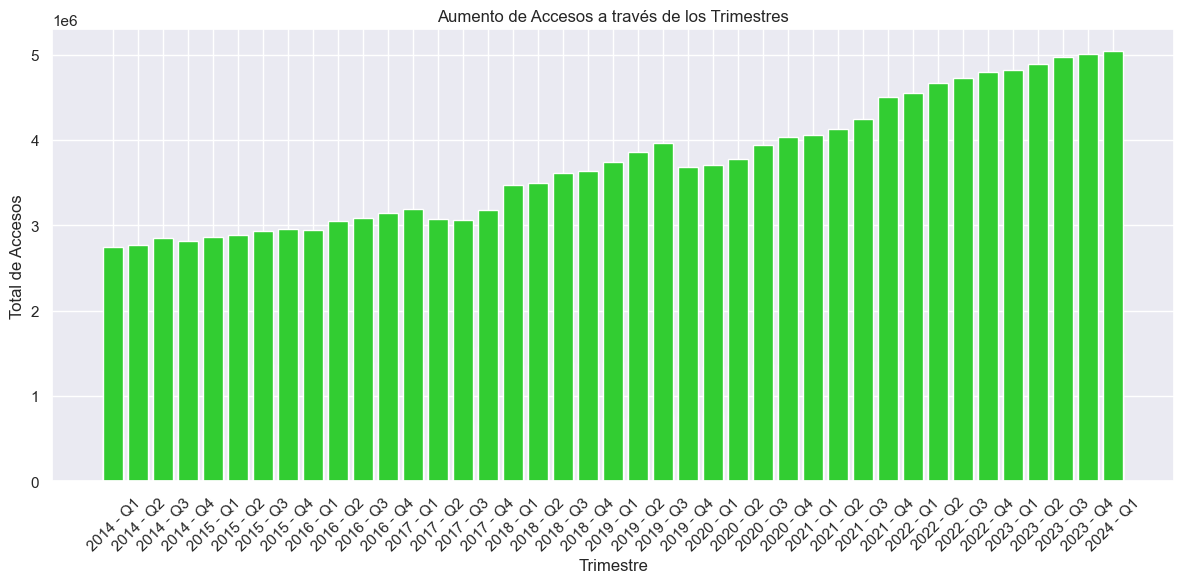

In [208]:
# Lista de accesos
accesos = ['ADSL', 'Cablemodem', 'Fibra óptica', 'Wireless', 'Otras Tecnologias']

# Calcular el total de accesos directamente en el gráfico
plt.figure(figsize=(12, 6))
plt.bar(df['Periodo'], df.loc[:, accesos].sum(axis=1), color='limegreen')

# Etiquetas y título
plt.xlabel('Trimestre')
plt.ylabel('Total de Accesos')
plt.title('Aumento de Accesos a través de los Trimestres')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()

# Mostrar gráfico
plt.show()

Es posible observar un crecimiento contaste en el acceso a Internet, sin embargo no hay información si el crecimiento es acorde al aumento poblacional/de vivienda.

Exploremos esa relación.

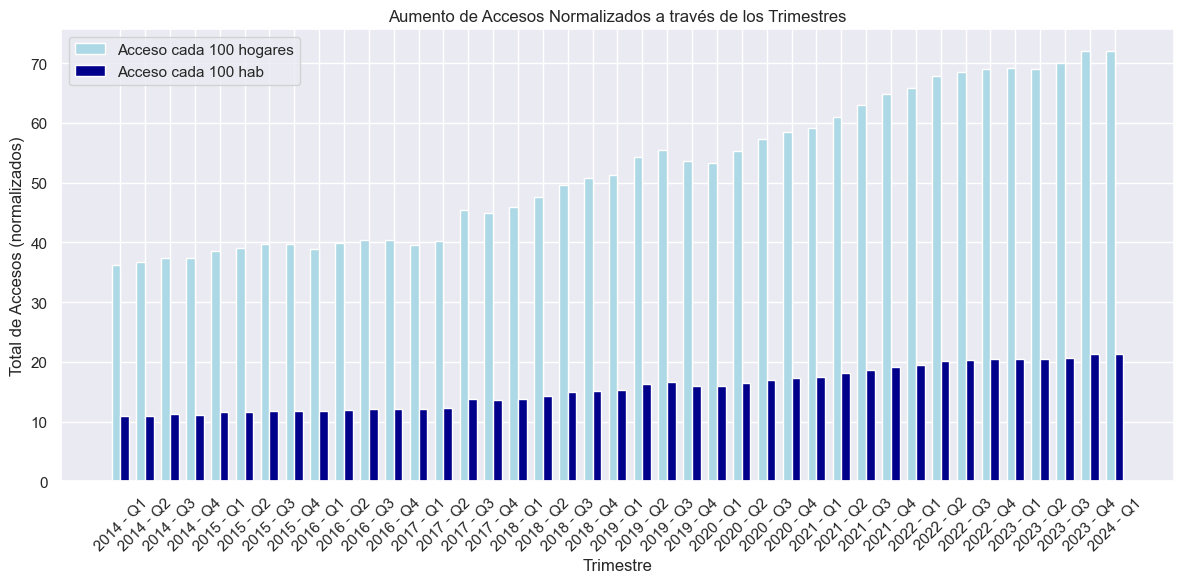

In [209]:
# Configurar la figura
plt.figure(figsize=(12, 6))

# Calcular promedios agrupados
promedios = df.groupby('Periodo')[['Accesos por cada 100 hogares', 'Accesos por cada 100 hab']].mean()

# Crear las barras
bar_width = 0.35
x = range(len(promedios.index))

# Gráfico de barras
plt.bar(x, promedios['Accesos por cada 100 hogares'], color='lightblue', width=bar_width, label='Acceso cada 100 hogares')
plt.bar([p + bar_width for p in x], promedios['Accesos por cada 100 hab'], color='darkblue', width=bar_width, label='Acceso cada 100 hab')

# Etiquetas y título
plt.xlabel('Trimestre')
plt.ylabel('Total de Accesos (normalizados)')
plt.title('Aumento de Accesos Normalizados a través de los Trimestres')
plt.xticks([p + bar_width / 2 for p in x], promedios.index, rotation=45)
plt.tight_layout()

# Leyenda
plt.legend()

# Mostrar gráfico
plt.show()


se observa un crecimieto en penetracion en hogares y habirante de acuerdo con el numero total de Accesos. 

Revisemos si es cierto: 

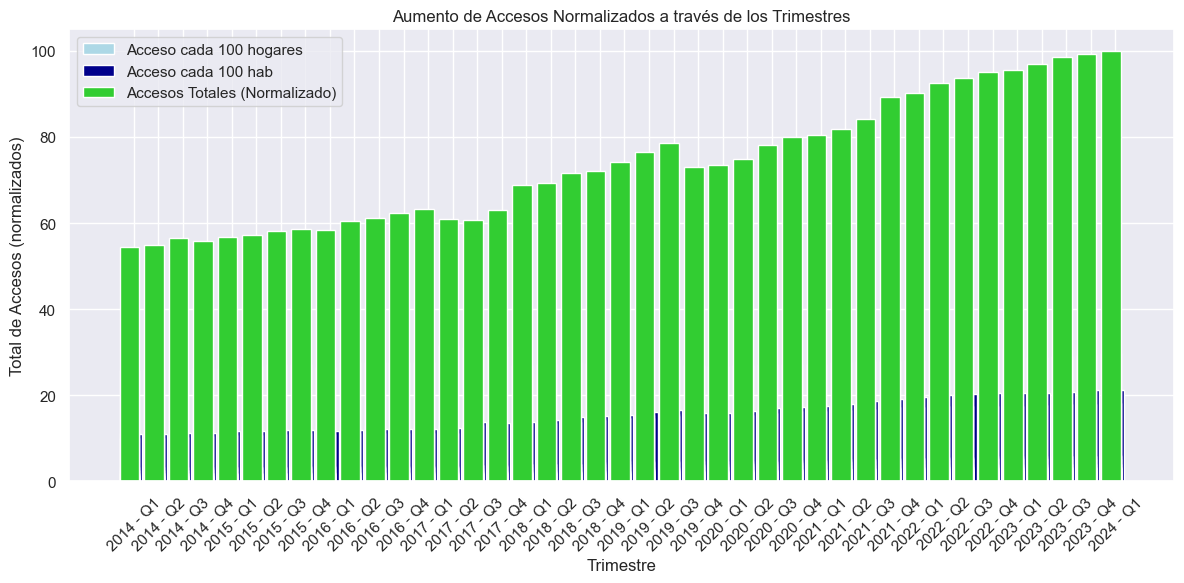

In [210]:
# Hacer una copia del DataFrame
df_norma = df.copy()

# Calcular 'tot_accesos' y normalizar
df_norma['tot_accesos'] = (df[accesos].sum(axis=1) / df[accesos].sum(axis=1).max()) * 100

# Calcular promedios agrupados
promedios = df.groupby('Periodo')[['Accesos por cada 100 hogares', 'Accesos por cada 100 hab']].mean()

# Configurar la figura
plt.figure(figsize=(12, 6))

# Crear las barras
bar_width = 0.35
x = range(len(promedios.index))

# Gráfico de barras
plt.bar(x, promedios['Accesos por cada 100 hogares'], color='lightblue', width=bar_width, label='Acceso cada 100 hogares')
plt.bar([p + bar_width for p in x], promedios['Accesos por cada 100 hab'], color='darkblue', width=bar_width, label='Acceso cada 100 hab')
plt.bar(df_norma['Periodo'], df_norma['tot_accesos'], color='limegreen', label='Accesos Totales (Normalizado)')

# Etiquetas y título
plt.xlabel('Trimestre')
plt.ylabel('Total de Accesos (normalizados)')
plt.title('Aumento de Accesos Normalizados a través de los Trimestres')
plt.xticks([p + bar_width / 2 for p in x], promedios.index, rotation=45)
plt.tight_layout()

# Leyenda
plt.legend()

# Mostrar gráfico
plt.show()


En el gráfico se puede observar que el incremento en el acceso a nivel nacional parece estar correlacionado de manera directa con el nivel de penetración en hogares y habitantes

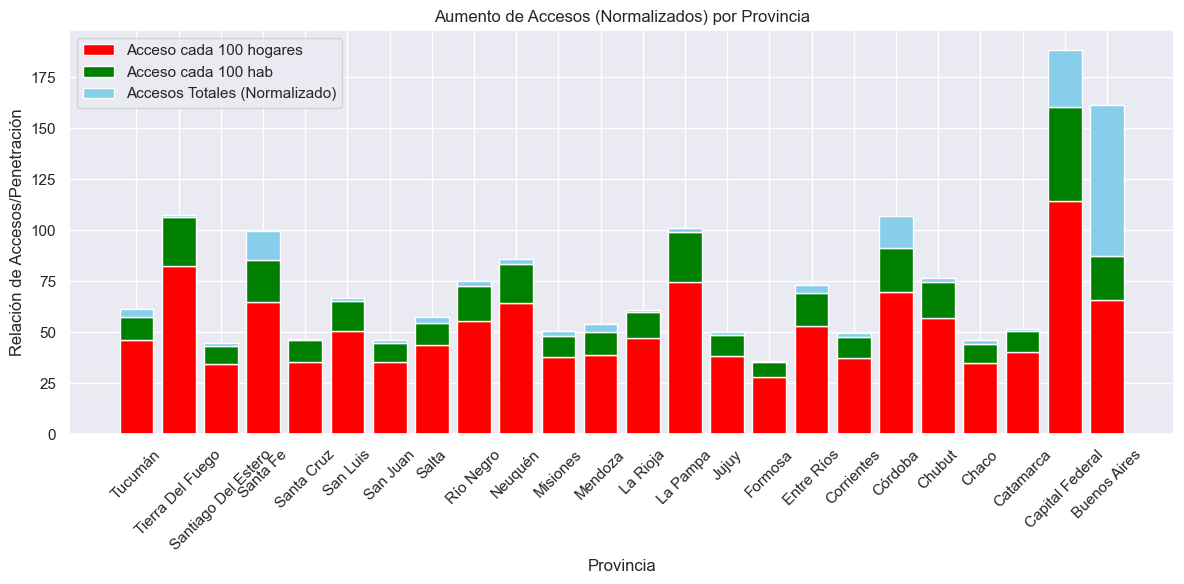

In [211]:
# Crear un DataFrame para almacenar los datos normalizados
df_norma = df.copy()

# Normalizar el total de accesos
df_norma['tot_accesos'] = df_norma[accesos].sum(axis=1)
df_norma['tot_accesos'] = df_norma['tot_accesos'] / df_norma['tot_accesos'].max() * 100

# Crear una figura para el gráfico
plt.figure(figsize=(12, 6))

# Crear un gráfico de columnas apiladas por provincia
provincias = df['Provincia'].unique()
x = range(len(provincias))

# Graficar accesos por provincia
for i, provincia in enumerate(provincias):
    # Filtrar el DataFrame por la provincia actual
    df_provincia = df_norma[df_norma['Provincia'] == provincia]

    # Graficar accesos por 100 hogares
    plt.bar(i, df_provincia['Accesos por cada 100 hogares'].mean(), color='red', label='Acceso cada 100 hogares' if i == 0 else "")
    
    # Graficar accesos por 100 habitantes apilados sobre el anterior
    plt.bar(i, df_provincia['Accesos por cada 100 hab'].mean(), color='green', label='Acceso cada 100 hab' if i == 0 else "", 
            bottom=df_provincia['Accesos por cada 100 hogares'].mean())

    # Graficar accesos totales normalizados apilados sobre los anteriores
    plt.bar(i, df_provincia['tot_accesos'].mean(), color='skyblue', label='Accesos Totales (Normalizado)' if i == 0 else "",
            bottom=df_provincia['Accesos por cada 100 hogares'].mean() + df_provincia['Accesos por cada 100 hab'].mean())

# Etiquetas y título
plt.xlabel('Provincia')
plt.ylabel('Relación de Accesos/Penetración')
plt.title('Aumento de Accesos (Normalizados) por Provincia')
plt.xticks(x, provincias, rotation=45)
plt.tight_layout()

# Leyenda
plt.legend()

# Mostrar gráfico
plt.show()


Es evidente que existe una considerable variación entre las provincias. Para ilustrar de manera más clara la presencia de valores atípicos, podemos generar un gráfico que facilite esta visualización

In [212]:
# Calcular los cuartiles y el rango intercuartil
accesos_tot = df[accesos].sum(axis=1)
Q1, Q3 = accesos_tot.quantile([0.25, 0.75])
IQR = Q3 - Q1

# Definir los límites inferior y superior para detectar outliers
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# Filtrar las provincias que tienen accesos fuera de los límites
provincias_outliers = df.loc[accesos_tot[(accesos_tot < limite_inferior) | (accesos_tot > limite_superior)].index, 'Provincia'].unique()

# Mostrar las provincias outliers
print("Provincias Outliers en cantidad de accesos:", ', '.join(provincias_outliers))


Provincias Outliers en cantidad de accesos: Santa Fe, Córdoba, Capital Federal, Buenos Aires


las provincias con mas outliers son las que tienen mayor poblacion. 

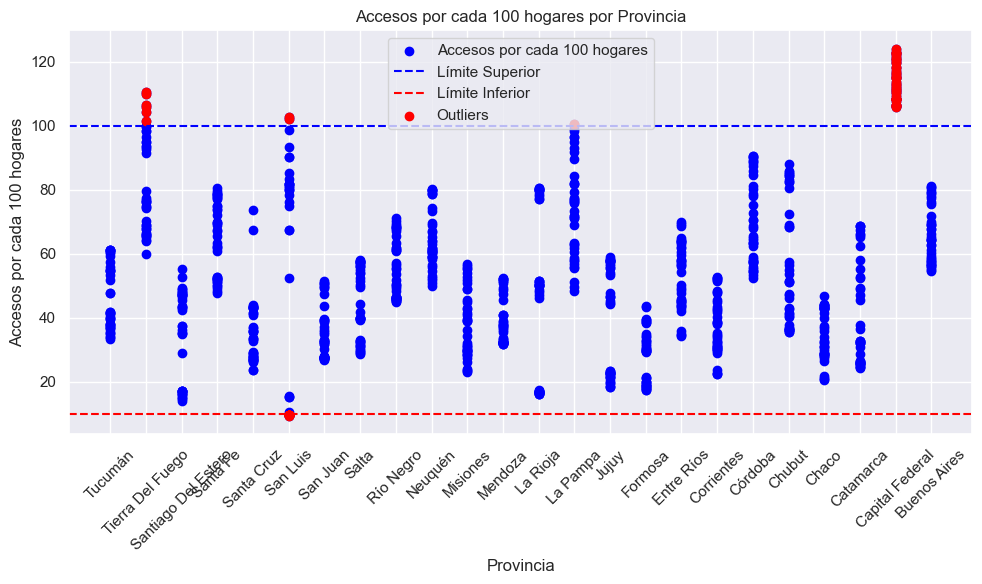

In [213]:
# Definir límites inferior y superior
limite_inferior, limite_superior = 10, 100

# Filtrar provincias con accesos fuera de los límites
provincias_outliers = df[df['Accesos por cada 100 hogares'].between(limite_inferior, limite_superior, inclusive='neither') == False]

# Crear la figura
plt.figure(figsize=(10, 6))

# Graficar accesos por cada 100 hogares
plt.scatter(df['Provincia'], df['Accesos por cada 100 hogares'], color='blue', label='Accesos por cada 100 hogares')

# Líneas para los límites superior e inferior
plt.axhline(limite_superior, color='blue', linestyle='--', label='Límite Superior')
plt.axhline(limite_inferior, color='red', linestyle='--', label='Límite Inferior')

# Resaltar los outliers si existen
if not provincias_outliers.empty:
    plt.scatter(provincias_outliers['Provincia'], provincias_outliers['Accesos por cada 100 hogares'], color='red', label='Outliers')

# Etiquetas, título, leyenda y diseño
plt.xlabel('Provincia')
plt.ylabel('Accesos por cada 100 hogares')
plt.title('Accesos por cada 100 hogares por Provincia')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.legend()

# Mostrar gráfico
plt.show()


La gran variación entre provincias, tanto en la dispersión de los accesos como en la presencia de outliers, sugiere diferencias significativas en la penetración de accesos a nivel regional. Provincias como Buenos Aires y Capital Federal tienen un alto grado de penetración, lo que podría estar relacionado con una mayor infraestructura tecnológica o concentración de la población. Por otro lado, provincias como San Luis muestran un bajo nivel de accesos, lo que podría deberse a limitaciones en infraestructura o menor densidad poblacional.

Es importante estudiar más a fondo estas diferencias para entender las causas subyacentes y poder plantear estrategias para mejorar la penetración en provincias con baja conectividad.

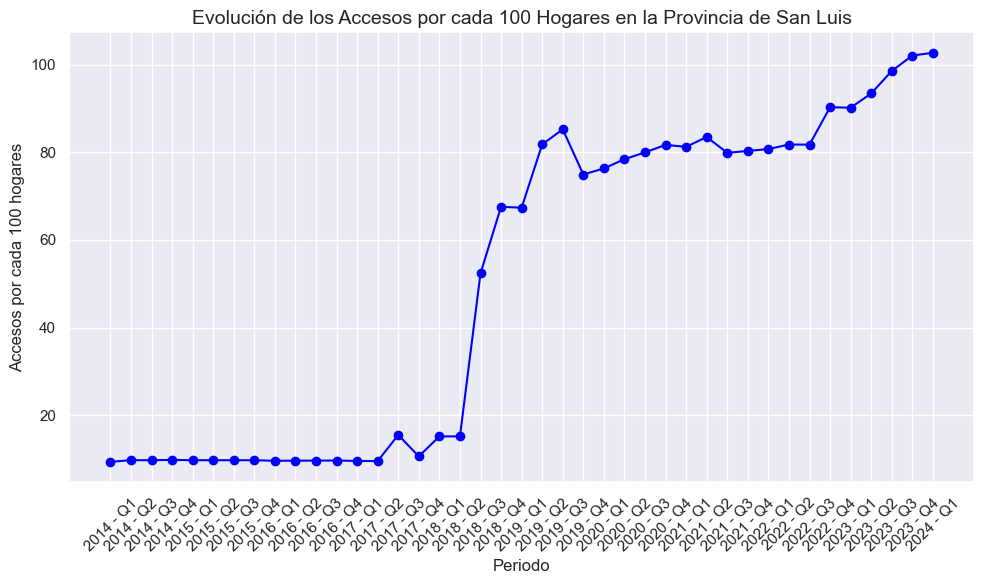

In [214]:
# Filtrar los datos correspondientes a la provincia de San Luis
df_san_luis = df[df['Provincia'] == 'San Luis']

# Configuración del tamaño de la figura
plt.figure(figsize=(10, 6))

# Crear gráfico de línea para mostrar la evolución de los accesos
plt.plot(df_san_luis['Periodo'], df_san_luis['Accesos por cada 100 hogares'], marker='o', color='blue')

# Establecer etiquetas y título del gráfico
plt.xlabel('Periodo', fontsize=12)
plt.ylabel('Accesos por cada 100 hogares', fontsize=12)
plt.title('Evolución de los Accesos por cada 100 Hogares en la Provincia de San Luis', fontsize=14)

# Rotar las etiquetas del eje x para mayor claridad
plt.xticks(rotation=45)

# Añadir cuadrícula para facilitar la lectura
plt.grid(True)

# Ajustar automáticamente los márgenes de la figura
plt.tight_layout()

# Mostrar el gráfico
plt.show()


San Luis destaca significativamente como un outlier, ya que atravesó ambos límites críticos (menos de 10 accesos por cada 100 hogares y más de 100 accesos por cada 100 hogares) en un período de diez años. Sin embargo, el verdadero crecimiento comenzó después del primer trimestre de 2018, con un aumento de casi un 400%.

Este notable crecimiento suscita la interrogante sobre cuáles otras provincias podrían tener un potencial de crecimiento similar en términos de penetración de accesos.

In [218]:
from sklearn.linear_model import LinearRegression

# Limpiar los nombres de las columnas
Accesos_tecnologia.columns = Accesos_tecnologia.columns.str.strip()

# Verificar los nombres de las columnas
print("Columnas del DataFrame:", Accesos_tecnologia.columns)

# Asegúrate de que las columnas 'Año' y 'Total' estén en el formato correcto
Accesos_tecnologia['Año'] = Accesos_tecnologia['Año'].astype(int)

# Verificar que el DataFrame no esté vacío y que contenga las columnas necesarias
print(Accesos_tecnologia.head())

# Agrupar por provincia y año, sumando los accesos totales
df_grouped = Accesos_tecnologia.groupby(['Provincia', 'Año'], as_index=False)['Total'].sum()

# Calcular la tendencia de accesos mediante regresión lineal
def calcular_tendencia(df):
    X = df['Año'].values.reshape(-1, 1)  # Años como variable independiente
    y = df['Total'].values  # Total de accesos como variable dependiente

    model = LinearRegression()
    model.fit(X, y)

    return model.coef_[0]  # Retornar la pendiente

# Aplicar la función para calcular la tendencia en cada provincia
tendencias = df_grouped.groupby('Provincia').apply(calcular_tendencia).reset_index()
tendencias.columns = ['Provincia', 'Tendencia']

# Filtrar provincias con tendencia positiva
provincias_con_tendencia_positiva = tendencias[tendencias['Tendencia'] > 0]

provincias_con_tendencia_positiva = provincias_con_tendencia_positiva.sort_values(by='Tendencia', ascending=False)

# Mostrar resultados
print("Provincias con tendencia positiva en el número de accesos:")
print(provincias_con_tendencia_positiva)


Columnas del DataFrame: Index(['Año', 'Trimestre', 'Provincia', 'ADSL', 'Cablemodem', 'Fibra óptica',
       'Wireless', 'Otros', 'Total'],
      dtype='object')
    Año  Trimestre        Provincia      ADSL  Cablemodem  Fibra óptica  \
0  2024          1     Buenos Aires  203297.0   2790663.0     1799013.0   
1  2024          1  Capital Federal   70108.0   1177475.0      203756.0   
2  2024          1        Catamarca    5901.0     11025.0       56542.0   
3  2024          1            Chaco   11343.0     58929.0       64463.0   
4  2024          1           Chubut   26306.0     77217.0       26356.0   

   Wireless     Otros      Total  
0  150290.0  101294.0  5044557.0  
1    4493.0   48879.0  1504711.0  
2    1384.0      81.0    74933.0  
3    8404.0   12404.0   155543.0  
4   30867.0    9930.0   170676.0  
Provincias con tendencia positiva en el número de accesos:
              Provincia      Tendencia
0          Buenos Aires  284272.009091
6               Córdoba   77324.763636
2

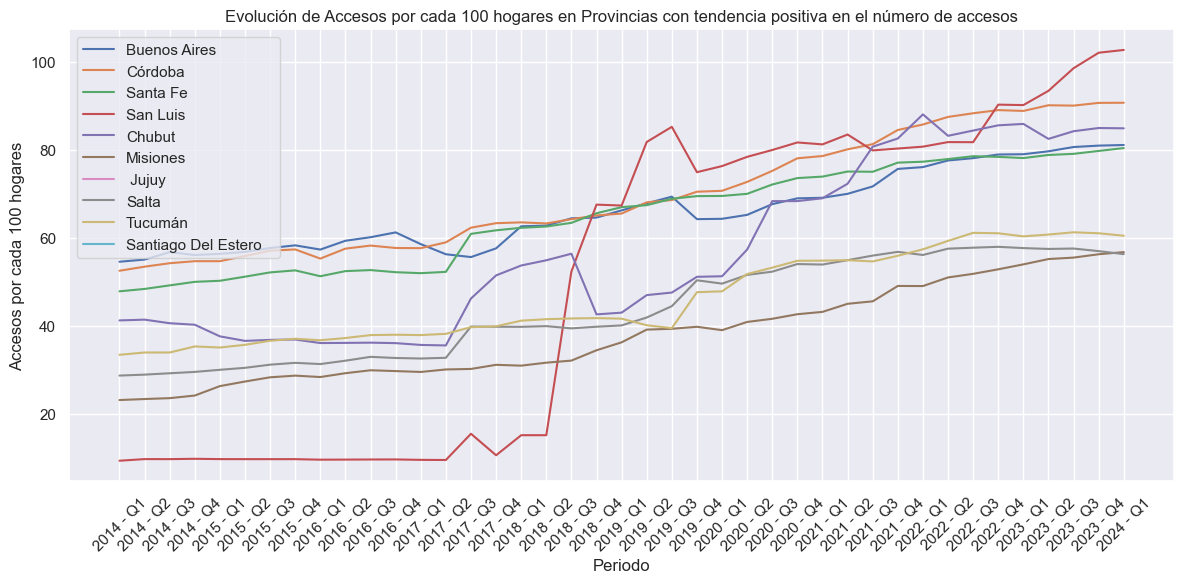

In [220]:
# Gráfico de líneas múltiples
plt.figure(figsize=(12, 6))
provincias_interes = ['Buenos Aires', 'Córdoba', 'Santa Fe','San Luis', 'Chubut', 'Misiones', ' Jujuy', 'Salta', 'Tucumán', 'Santiago Del Estero   '] # Puedes modificar esta lista
for provincia in provincias_interes:
    df_provincia = df[df['Provincia'] == provincia]
    plt.plot(df_provincia['Periodo'], df_provincia['Accesos por cada 100 hogares'], label=provincia)

plt.xlabel('Periodo')
plt.ylabel('Accesos por cada 100 hogares')
plt.title('Evolución de Accesos por cada 100 hogares en Provincias con tendencia positiva en el número de accesos')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


- Se observa un crecimiento sostenido y elevado para provicias como Buenos Aires y COrdoba, Santa Fe sigue una tendencias similar aunque es ligeramente mas baja, lo que suguiere un crecimeinto moderado pero sostenido. 
- San Luis muestra un aumento repentino alrededor del 2018-2019, lo que podría reflejar un incremento drástico en la adopción de nuevas tecnologías o una política que incentivó el acceso en esa provincia.
- Chubut tiene un patrón algo irregular, con subidas y bajadas en el número de accesos, lo cual sugiere posibles problemas de infraestructura o variaciones en la oferta de servicios.
- Misiones, Salta, Jujuy, y Tucumán muestran una tendencia de crecimiento más lenta, pero consistente. Estas provincias comienzan desde un nivel bajo y van aumentando de forma estable.
- Las provincias como Santiago del Estero parecen estar a la zaga en términos de crecimiento relativo. Aunque la tendencia es positiva, los niveles de acceso son más bajos en comparación con las provincias más desarrolladas.

Es muy importante tener el cuenta que a partir de 2020, la mayoría de las provincias muestran un incremento en los accesos, lo que podría estar relacionado con el aumento de la demanda de servicios tecnológicos debido a la pandemia de COVID-19. La necesidad de trabajar y estudiar desde casa puede haber acelerado la adopción de tecnología.

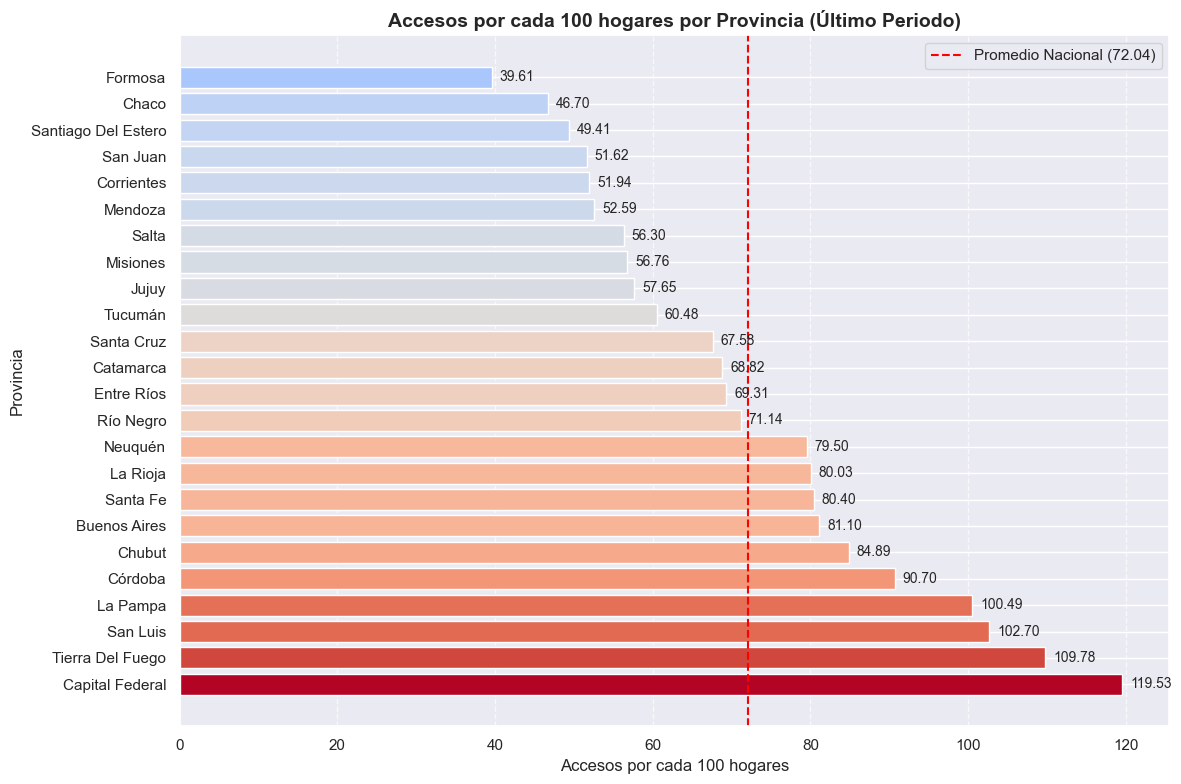

In [221]:
# Obtener el último periodo
ultimo_periodo = df[df['Periodo'] == df['Periodo'].max()]  
ultimo_periodo = ultimo_periodo.sort_values(by='Accesos por cada 100 hogares', ascending=False)

# Definir el tamaño de la figura
plt.figure(figsize=(12, 8))

# Usar una paleta de colores más distintiva
cmap = sns.color_palette("coolwarm", as_cmap=True)

# Crear el gráfico de barras horizontales, con un gradiente de colores
bars = plt.barh(ultimo_periodo['Provincia'], 
                ultimo_periodo['Accesos por cada 100 hogares'], 
                color=cmap(ultimo_periodo['Accesos por cada 100 hogares'] / ultimo_periodo['Accesos por cada 100 hogares'].max()))

# Calcular y añadir una línea para el promedio nacional
promedio_nacional = ultimo_periodo['Accesos por cada 100 hogares'].mean()
plt.axvline(promedio_nacional, color='red', linestyle='--', label=f'Promedio Nacional ({promedio_nacional:.2f})')

# Anotaciones para cada barra (mostrar el valor exacto de accesos)
for bar in bars:
    plt.text(bar.get_width() + 1, bar.get_y() + bar.get_height()/2, f'{bar.get_width():.2f}', va='center', ha='left', fontsize=10)

# Etiquetas y título
plt.xlabel('Accesos por cada 100 hogares')
plt.ylabel('Provincia')
plt.title('Accesos por cada 100 hogares por Provincia (Último Periodo)', fontsize=14, fontweight='bold')

# Ajustar el diseño y grid para mejor visualización
plt.grid(True, axis='x', linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()

# Mostrar la gráfica
plt.show()


1. Promedio Nacional:La línea roja discontinua indica el promedio nacional de accesos por cada 100 hogares, que es 72.04. Este valor sirve como referencia para comparar cada provincia con la media del país.
2. Las provincias que tienen accesos por debajo de la media nacional son, en su mayoría, de las regiones más alejadas de los centros urbanos principales.
3. Algunas provincias como Tucumán (60.48 accesos), Santa Cruz (67.58 accesos) y Catamarca (68.82 accesos) se encuentran algo cercanas al promedio nacional, pero aún por debajo. Esto puede indicar que, aunque han mejorado sus accesos, todavía están rezagadas en comparación con otras regiones.
4. Las provincias con más accesos que el promedio son, en general, provincias con mayor desarrollo económico y tecnológico

Existe un claro contraste entre las provincias más urbanas y desarrolladas (Capital Federal, Buenos Aires, Córdoba) y aquellas más rurales o alejadas (Formosa, Chaco, Santiago del Estero). Este contraste destaca la brecha digital que existe entre diferentes partes del país.

A partir de esta grafica podemos tambien pregutnarnos, si ademas del desequilibrio que existe por el acceso a internet hay tambien una diferencias en la calidad del servicio. 

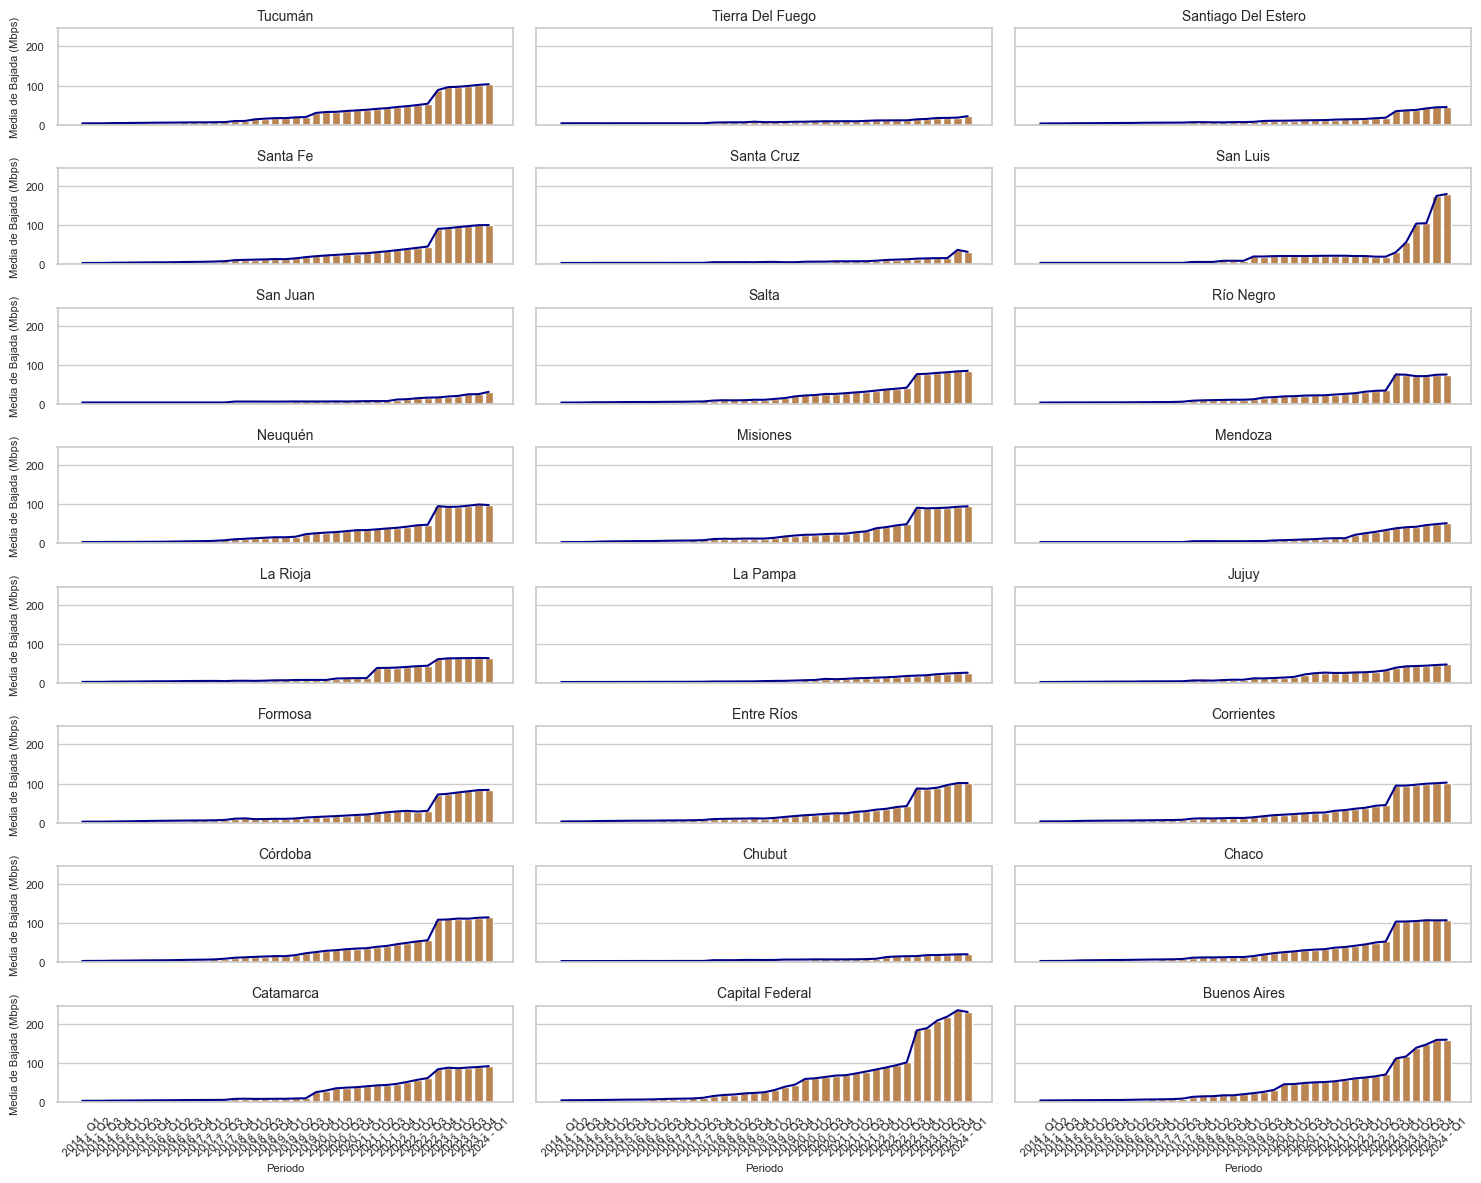

In [222]:
# Ajuste de estilo
sns.set(style="whitegrid")

# Lista de provincias
provincias = df['Provincia'].unique()

# Crear subplots (ajustar el tamaño según la cantidad de provincias)
fig, axes = plt.subplots(nrows=len(provincias)//3, ncols=3, figsize=(15, 12), sharex=True, sharey=True)

# Iterar sobre cada provincia y su respectivo subplot
for ax, provincia in zip(axes.flatten(), provincias):
    
    df_provincia = df[df['Provincia'] == provincia].copy()

    # Graficar barras con un color variado y agregar línea de tendencia
    sns.barplot(x='Periodo', y='Mbps (Media de bajada)', data=df_provincia, ax=ax, color='peru')
    
    # Línea de tendencia (Regresión lineal simple)
    ax.plot(df_provincia['Periodo'], df_provincia['Mbps (Media de bajada)'], color='darkblue', label='Tendencia')

    # Etiquetas y estilo
    ax.set_title(f'{provincia}', fontsize=10)
    ax.set_xlabel('Periodo', fontsize=8)
    ax.set_ylabel('Media de Bajada (Mbps)', fontsize=8)
    ax.tick_params(axis='x', rotation=45, labelsize=8)
    ax.tick_params(axis='y', labelsize=8)

# Espacio entre subplots
plt.tight_layout()

# Mostrar gráfica
plt.show()


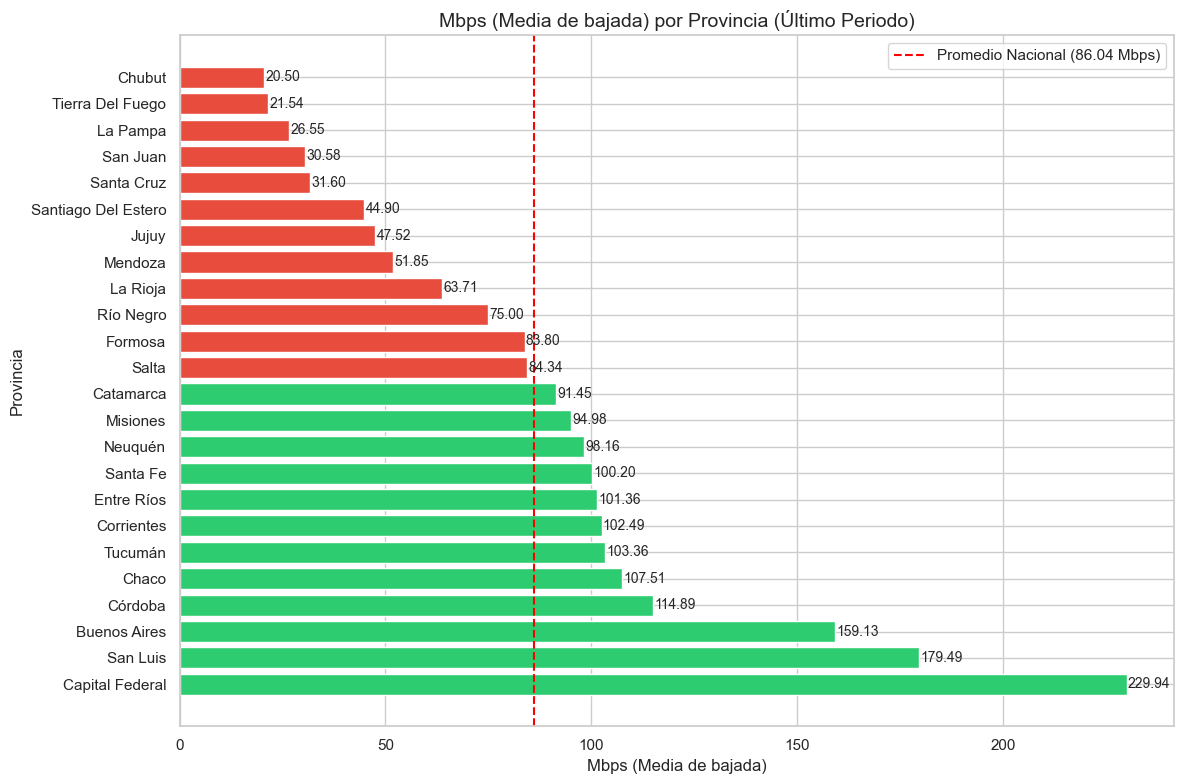

In [223]:
# Estilo de seaborn
sns.set(style="whitegrid")

# Filtrar los datos para el último periodo
ultimo_periodo = df[df['Periodo'] == df['Periodo'].max()]

# Ordenar por Mbps de bajada de mayor a menor
ultimo_periodo = ultimo_periodo.sort_values(by='Mbps (Media de bajada)', ascending=False)

# Crear paleta de colores (diferenciar por encima y por debajo del promedio nacional)
promedio_nacional = ultimo_periodo['Mbps (Media de bajada)'].mean()
colores = ['#2ecc71' if x >= promedio_nacional else '#e74c3c' for x in ultimo_periodo['Mbps (Media de bajada)']]

# Graficar
plt.figure(figsize=(12, 8))
barras = plt.barh(ultimo_periodo['Provincia'], ultimo_periodo['Mbps (Media de bajada)'], color=colores)

# Línea vertical para el promedio nacional
plt.axvline(promedio_nacional, color='red', linestyle='--', label=f'Promedio Nacional ({promedio_nacional:.2f} Mbps)')

# Agregar etiquetas con los valores de Mbps al final de cada barra
for barra in barras:
    plt.text(barra.get_width() + 0.3, barra.get_y() + barra.get_height()/2, f'{barra.get_width():.2f}', 
             va='center', fontsize=10)

# Etiquetas y título
plt.xlabel('Mbps (Media de bajada)', fontsize=12)
plt.ylabel('Provincia', fontsize=12)
plt.title('Mbps (Media de bajada) por Provincia (Último Periodo)', fontsize=14)
plt.legend()

# Ajustar el diseño para evitar solapamientos
plt.tight_layout()

# Mostrar gráfica
plt.show()


las gráficas muestra claramente que existe una desigualdad considerable en la distribución de la velocidad de internet entre provincias. Las regiones rurales y alejadas parecen estar rezagadas en cuanto a acceso a una velocidad de internet adecuada, lo que puede tener implicaciones socioeconómicas significativas

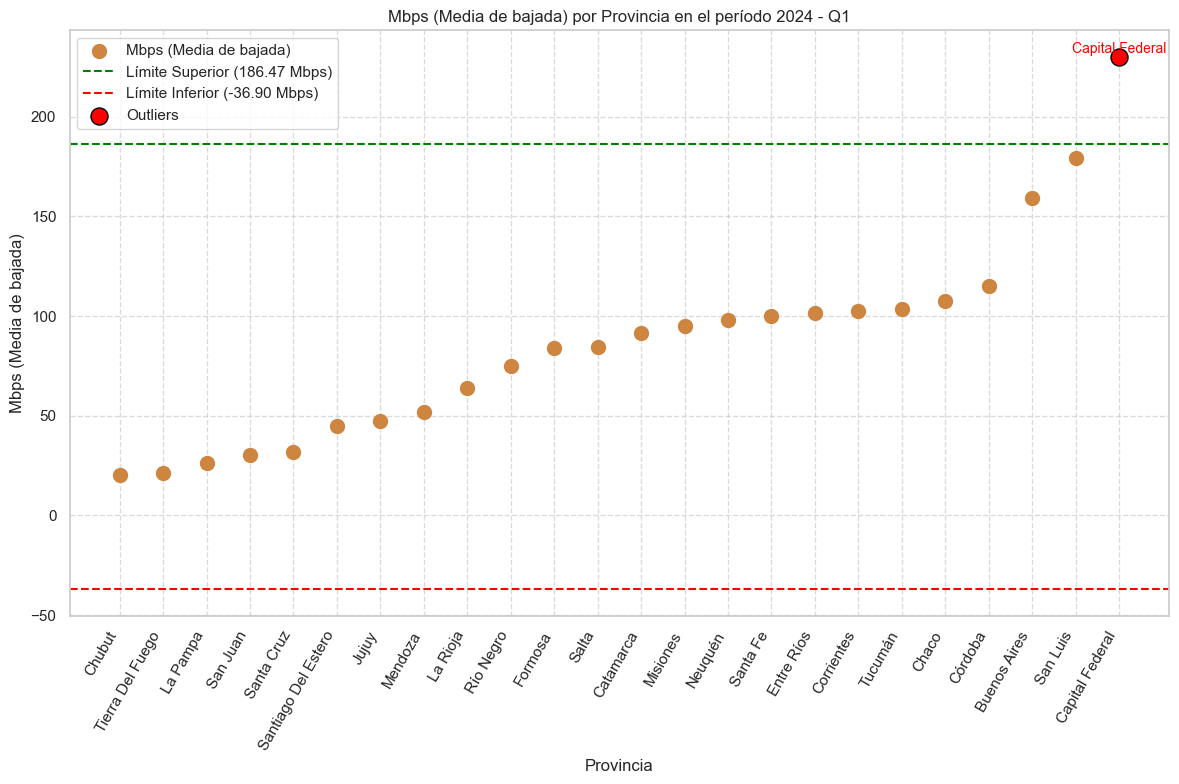

In [224]:

# Obtener el último periodo
ultimo_periodo = df['Periodo'].max()
df_ultimo_periodo = df[df['Periodo'] == ultimo_periodo]

# Cálculo del IQR y límites
Q1 = df_ultimo_periodo['Mbps (Media de bajada)'].quantile(0.25)
Q3 = df_ultimo_periodo['Mbps (Media de bajada)'].quantile(0.75)
IQR = Q3 - Q1

limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# Identificación de outliers
provincias_outliers = df_ultimo_periodo[(df_ultimo_periodo['Mbps (Media de bajada)'] < limite_inferior) | 
                                        (df_ultimo_periodo['Mbps (Media de bajada)'] > limite_superior)]

# Ordenar provincias por la velocidad media de bajada
df_ultimo_periodo = df_ultimo_periodo.sort_values(by='Mbps (Media de bajada)')

plt.figure(figsize=(12, 8))

# Gráfico de dispersión
plt.scatter(df_ultimo_periodo['Provincia'], df_ultimo_periodo['Mbps (Media de bajada)'], 
            color='peru', label='Mbps (Media de bajada)', s=100)

# Límites superior e inferior
plt.axhline(limite_superior, color='green', linestyle='--', label=f'Límite Superior ({limite_superior:.2f} Mbps)')
plt.axhline(limite_inferior, color='red', linestyle='--', label=f'Límite Inferior ({limite_inferior:.2f} Mbps)')

# Outliers
if not provincias_outliers.empty:
    plt.scatter(provincias_outliers['Provincia'], provincias_outliers['Mbps (Media de bajada)'], 
                color='red', label='Outliers', s=150, edgecolor='black')
    
    # Agregar etiquetas a los outliers
    for i, row in provincias_outliers.iterrows():
        plt.text(row['Provincia'], row['Mbps (Media de bajada)'] + 2, row['Provincia'], 
                 color='red', ha='center', fontsize=10)

plt.xlabel('Provincia')
plt.ylabel('Mbps (Media de bajada)')
plt.title(f'Mbps (Media de bajada) por Provincia en el período {ultimo_periodo}')

# Rotar las etiquetas de las provincias en el eje X
plt.xticks(rotation=60, ha='right')

plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.legend()

plt.show()


### la calidad de la velocidad de internet no se correlaciona necesariamente con el nivel de penetración
- Alta penetración no garantiza alta velocidad: En regiones donde el acceso a internet es elevado (alta penetración), la velocidad de conexión puede ser baja debido a múltiples factores, como la infraestructura limitada, sobrecarga de redes, o calidad de los proveedores de servicios.
-  Baja penetración no implica baja velocidad: Es posible que una región con menor penetración de internet tenga velocidades de conexión altas debido a que puede haber menos usuarios en la red o una infraestructura de internet de alta calidad en áreas específicas.
*Caso de Tierra del Fuego:*
Velocidad baja y penetración alta: Tierra del Fuego, a pesar de tener una alta penetración (muchos hogares conectados), puede tener una velocidad promedio baja (21.54 Mbps) , lo que indica que la infraestructura o la calidad del servicio puede no estar al nivel de otros lugares con menores usuarios, pero mejores redes.

Ahora, identifiquemos qué tecnologías están en crecimiento y cuáles están en declive, mostrando tendencia en el comportamiento de los usuarios.

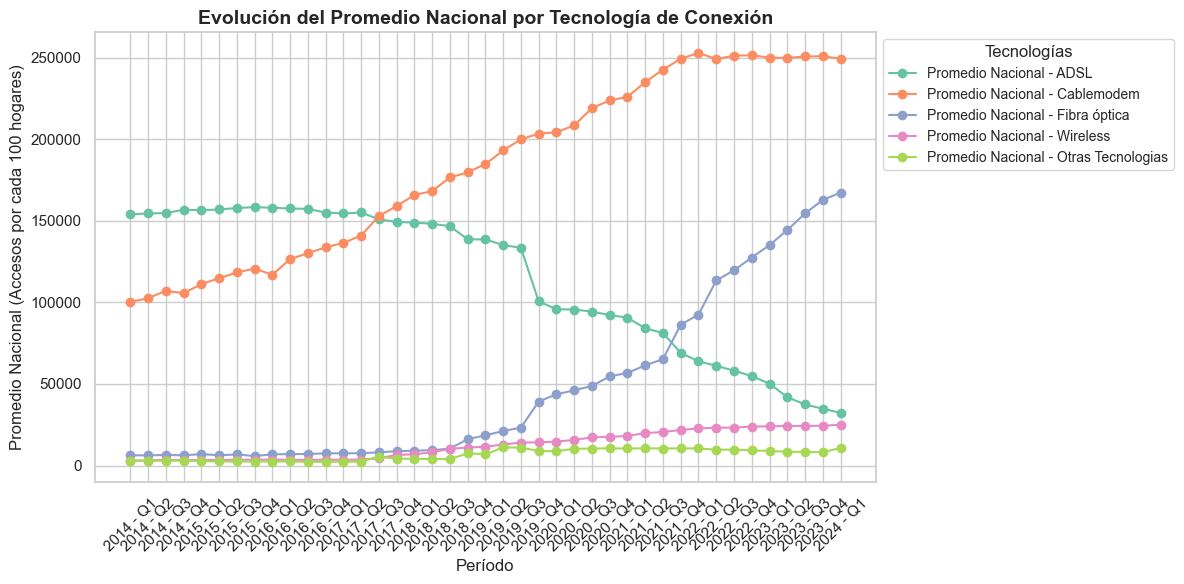

In [225]:
# Estilo de gráfico 
sns.set(style="whitegrid")

# Definir las columnas
columnas_grafico = ['ADSL', 'Cablemodem', 'Fibra óptica', 'Wireless', 'Otras Tecnologias']

# Promedio nacional por periodo
promedio_nacional_por_periodo = df.groupby('Periodo')[columnas_grafico].mean().reset_index()

# Crear la figura
plt.figure(figsize=(12, 6))

# Colores asignados automáticamente con paleta
colores = sns.color_palette("Set2", len(columnas_grafico))

# Graficar promedio nacional como línea para cada tecnología
for i, columna in enumerate(columnas_grafico):
    plt.plot(promedio_nacional_por_periodo['Periodo'], promedio_nacional_por_periodo[columna], 
             marker='o', label=f'Promedio Nacional - {columna}', color=colores[i])

# Título y etiquetas
plt.title('Evolución del Promedio Nacional por Tecnología de Conexión', fontsize=14, weight='bold')
plt.xlabel('Período', fontsize=12)
plt.ylabel('Promedio Nacional (Accesos por cada 100 hogares)', fontsize=12)

# Leyenda y formato del gráfico
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), title='Tecnologías', fontsize=10)
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

# Mostrar el gráfico
plt.show()


De esta grafica se pueden observar variod puntos:
1. Cablemoden es la tecnologia mas usada seguida por fibra optica 
2. El incremento de la velocidad de conexion a nivel nacional se correlaciona con el crecimeinto en la adopcion de la tecnologia de fibra optica( 2019 - Q3)
3. ADSL esta saliendo mostrndo una tendencia a menor uso. 

Para alcanzar una mejora significativa en la calidad del servicio de Internet que posicione a todas las provincias en un estándar moderno de velocidad, es probable que sea necesario aumentar la proporción de accesos mediante tecnología de fibra óptica y minimizar el uso de otras tecnologías al nivel más bajo posible.

### Analisis de KPIs

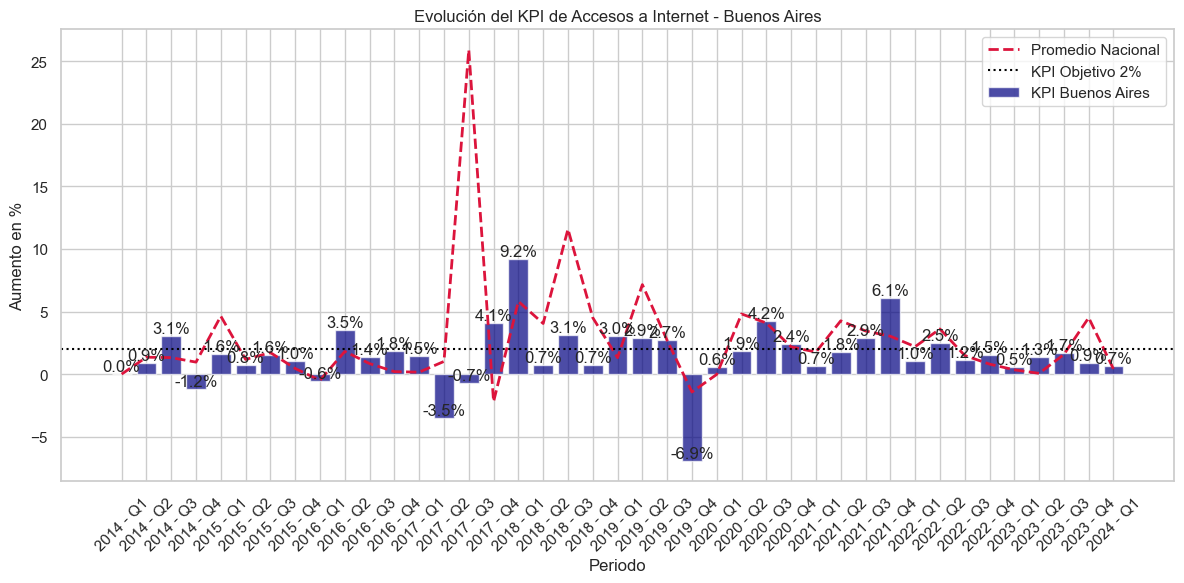

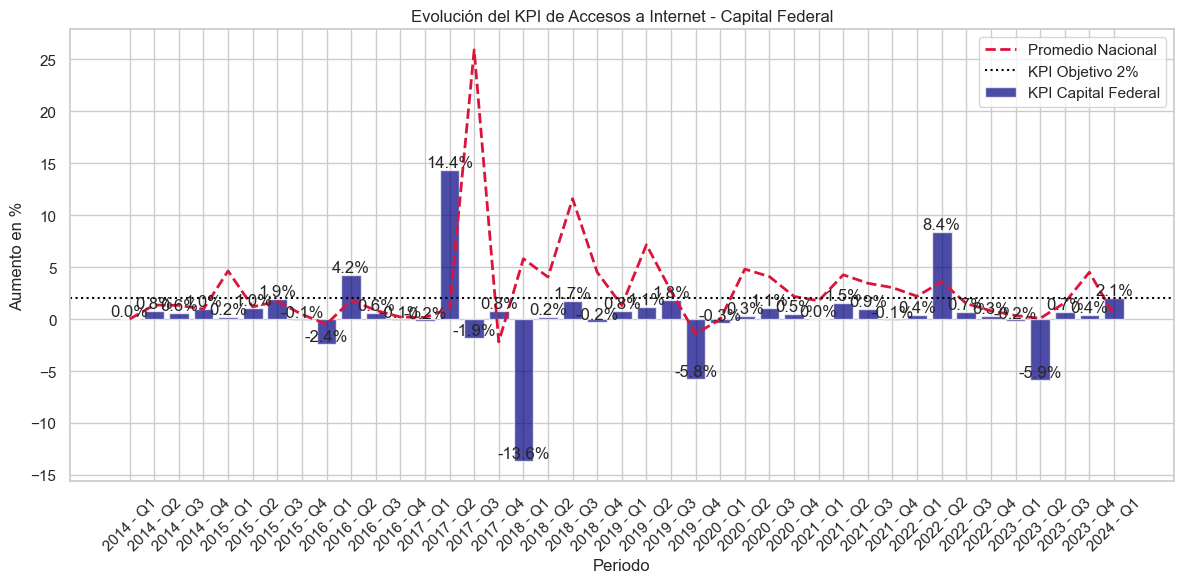

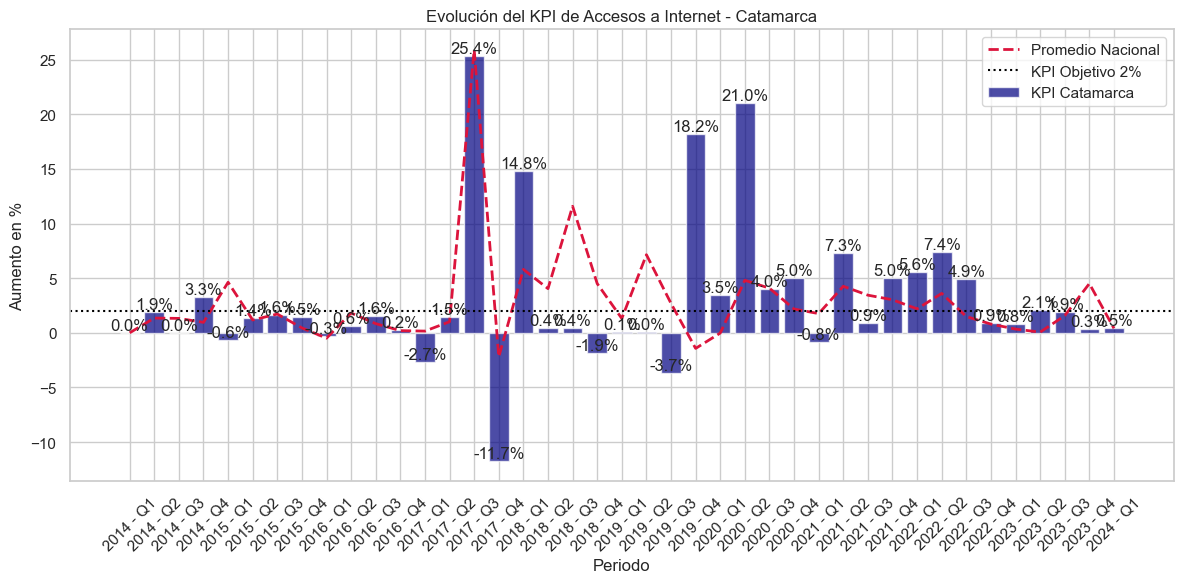

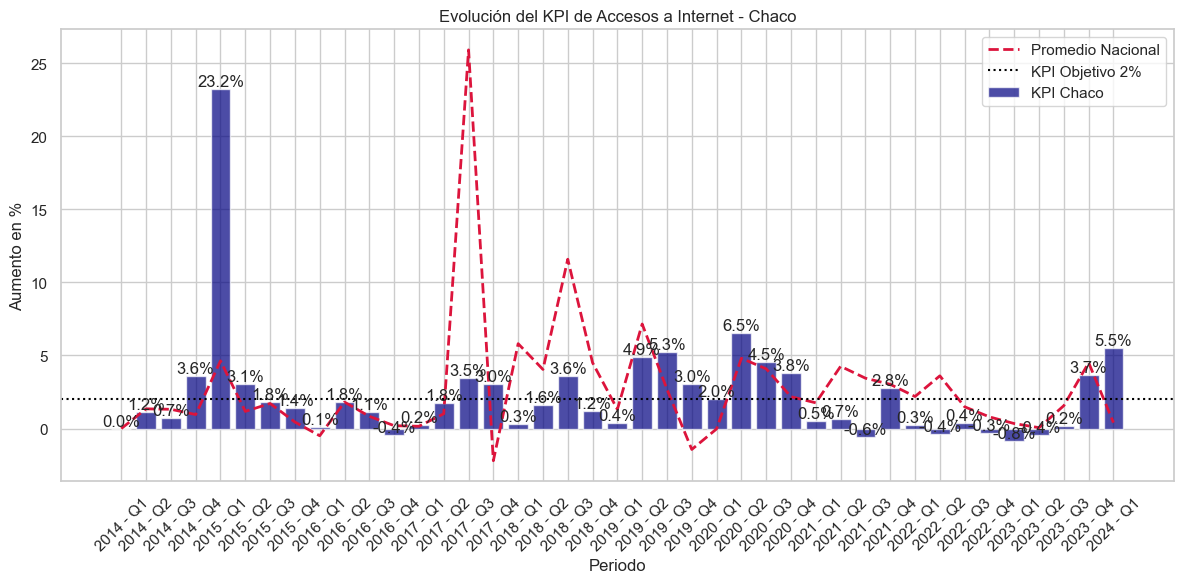

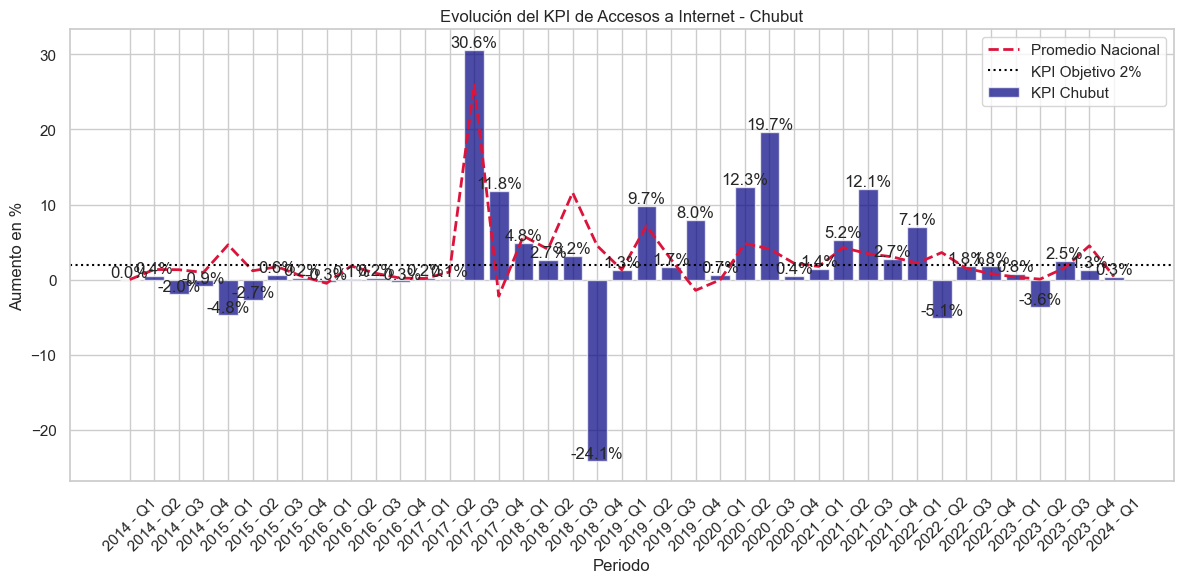

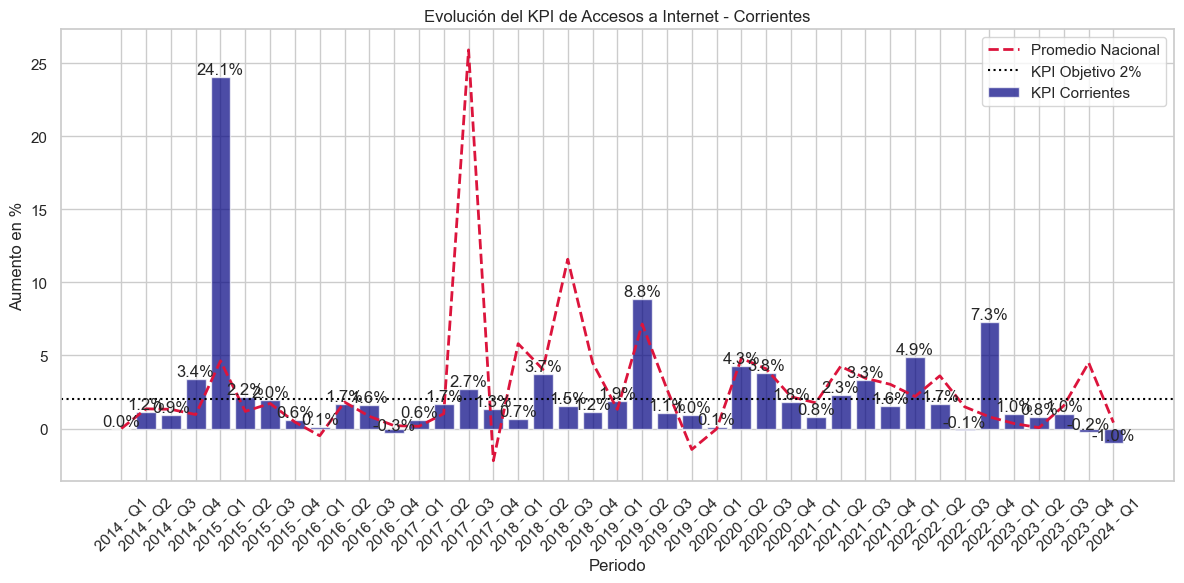

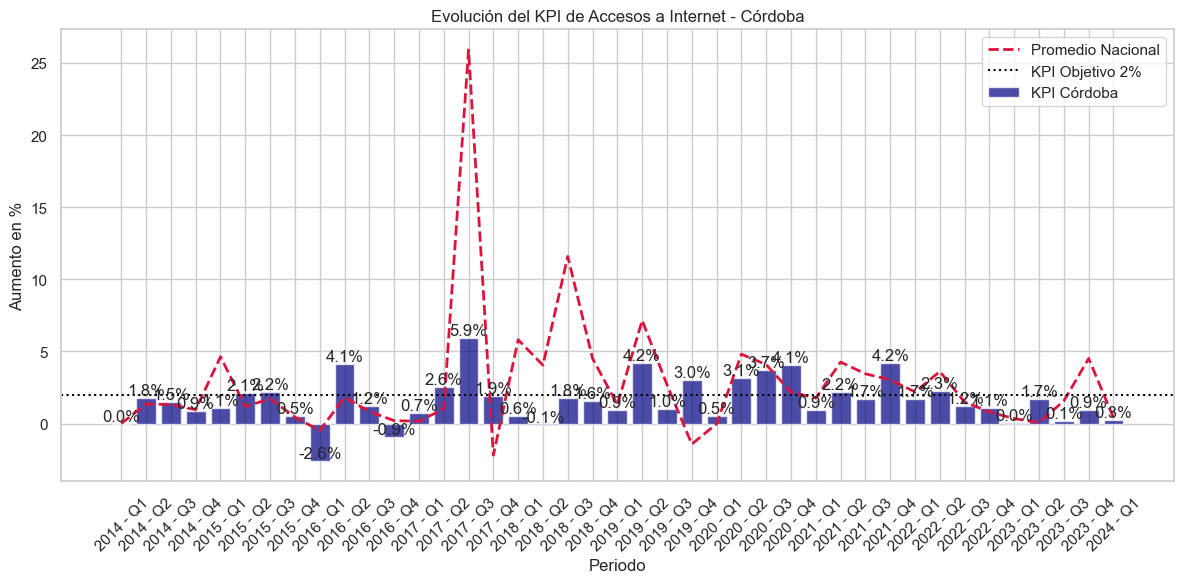

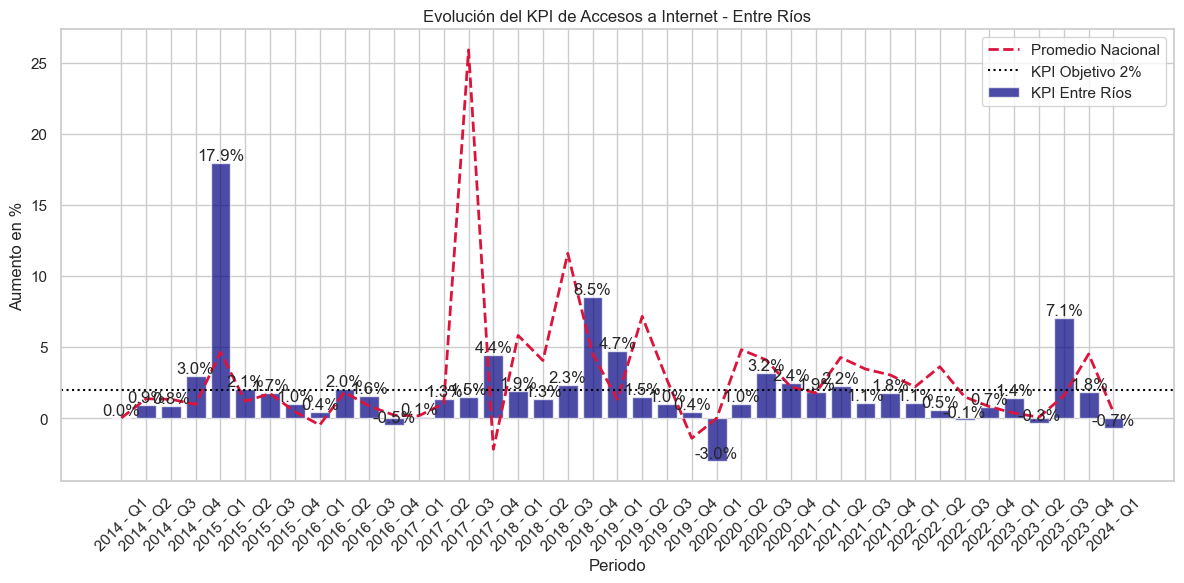

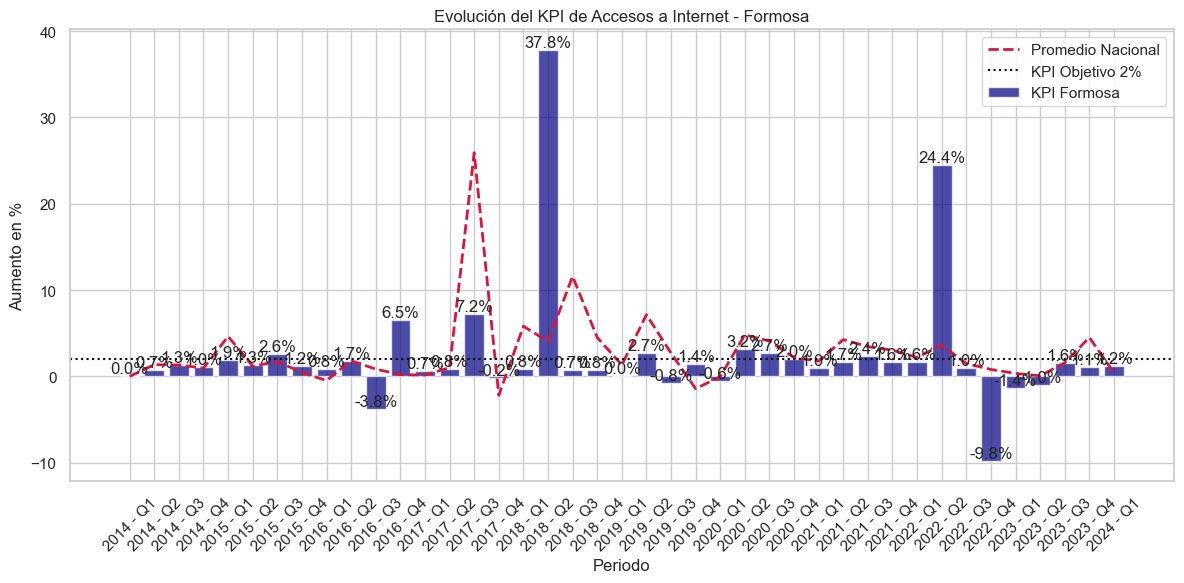

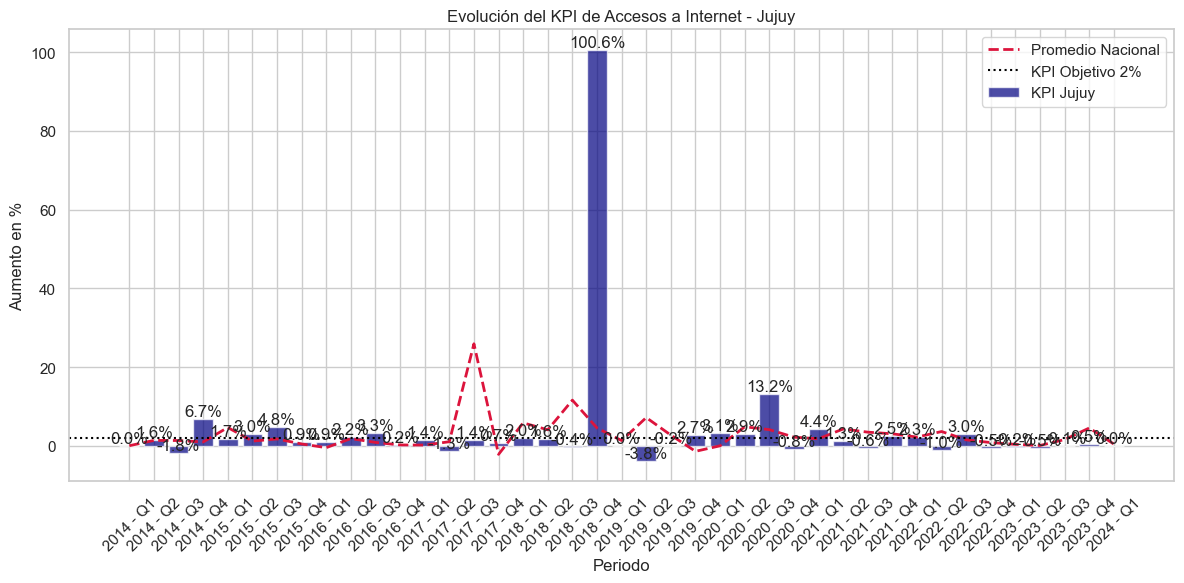

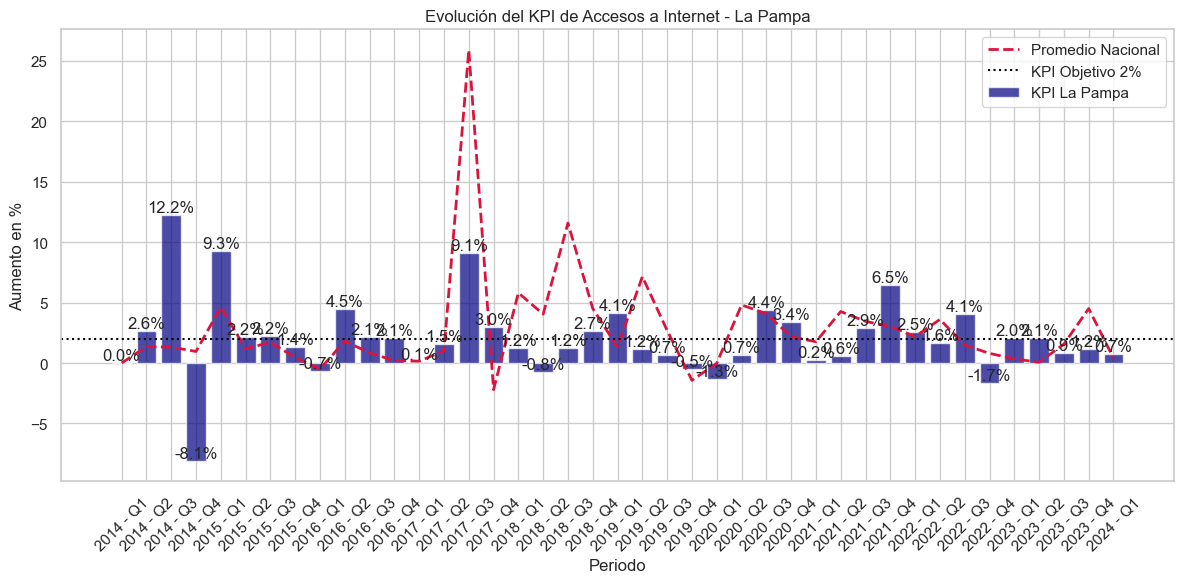

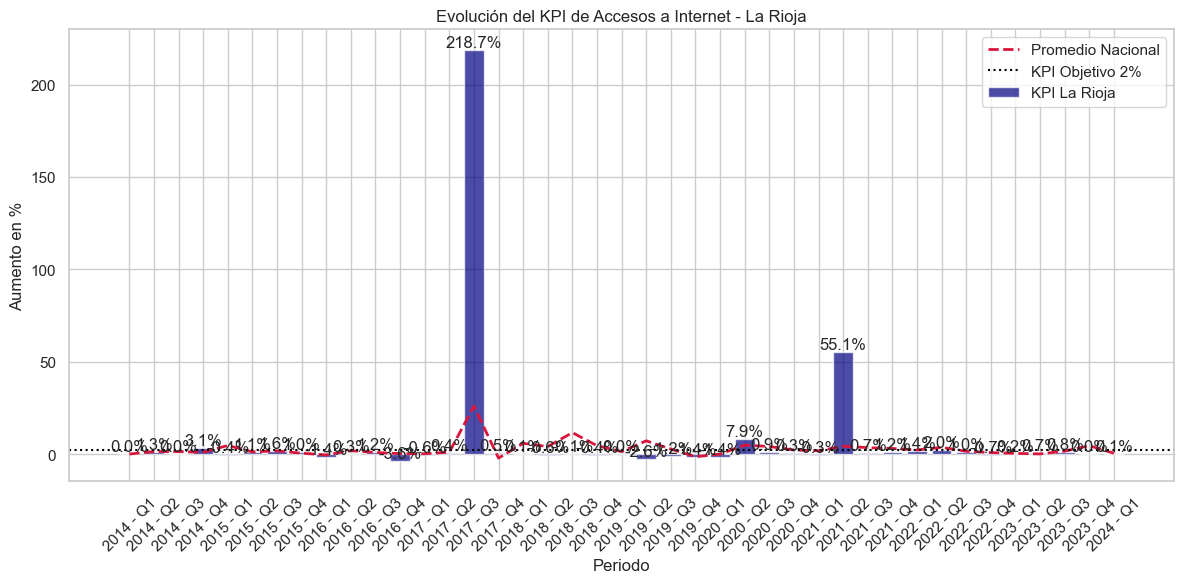

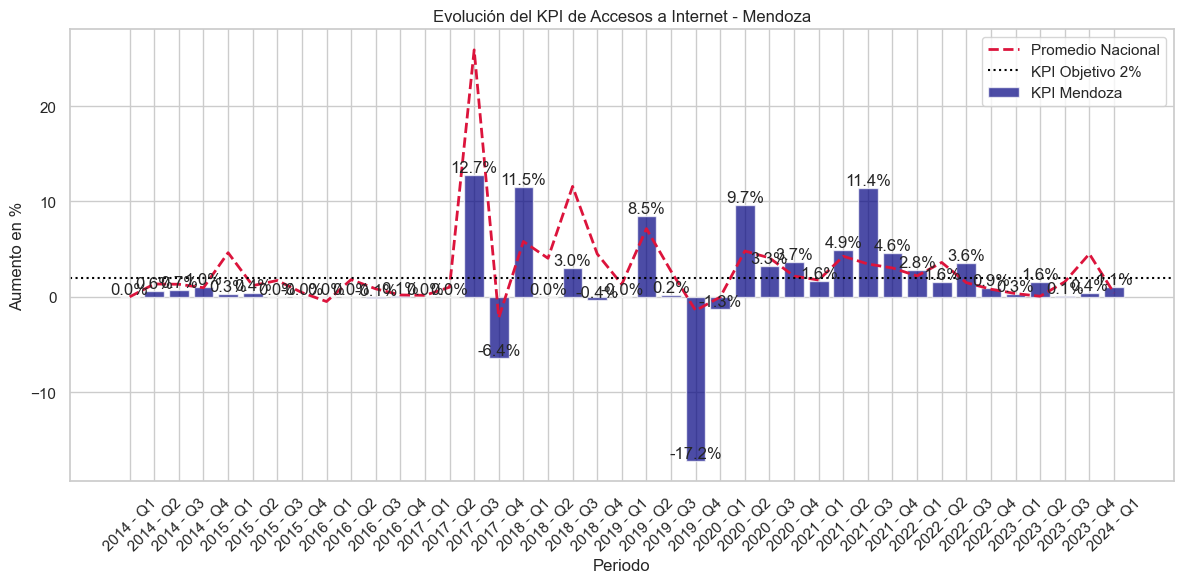

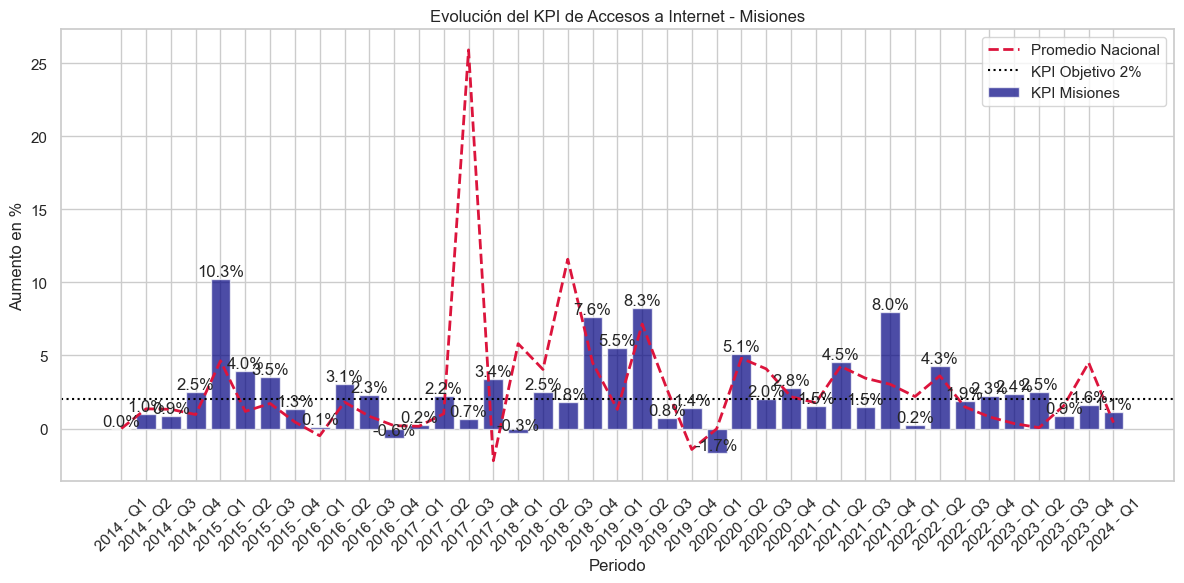

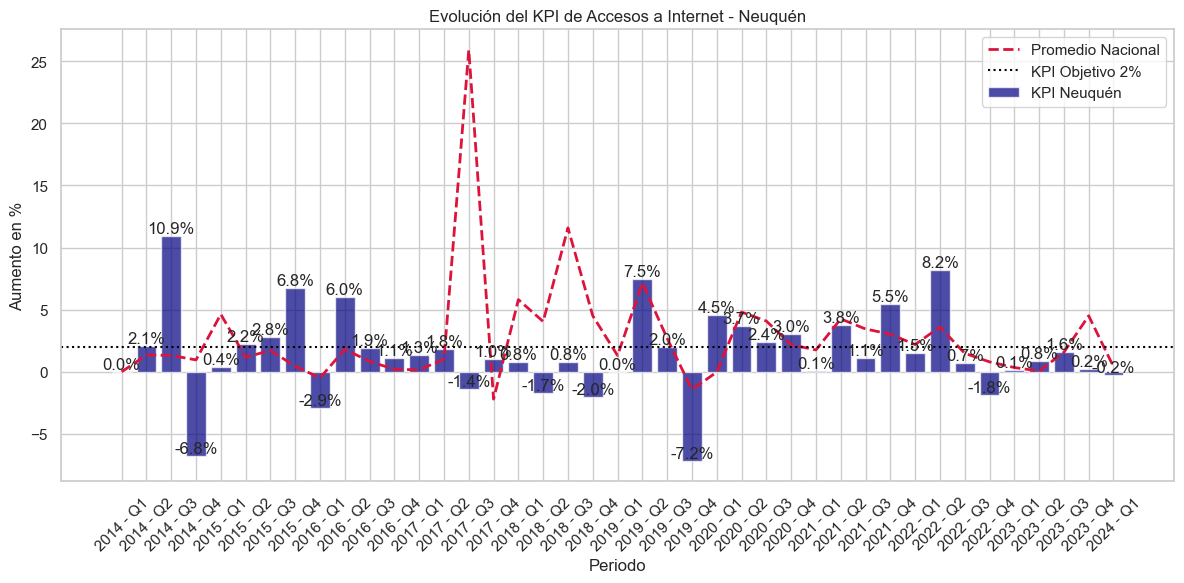

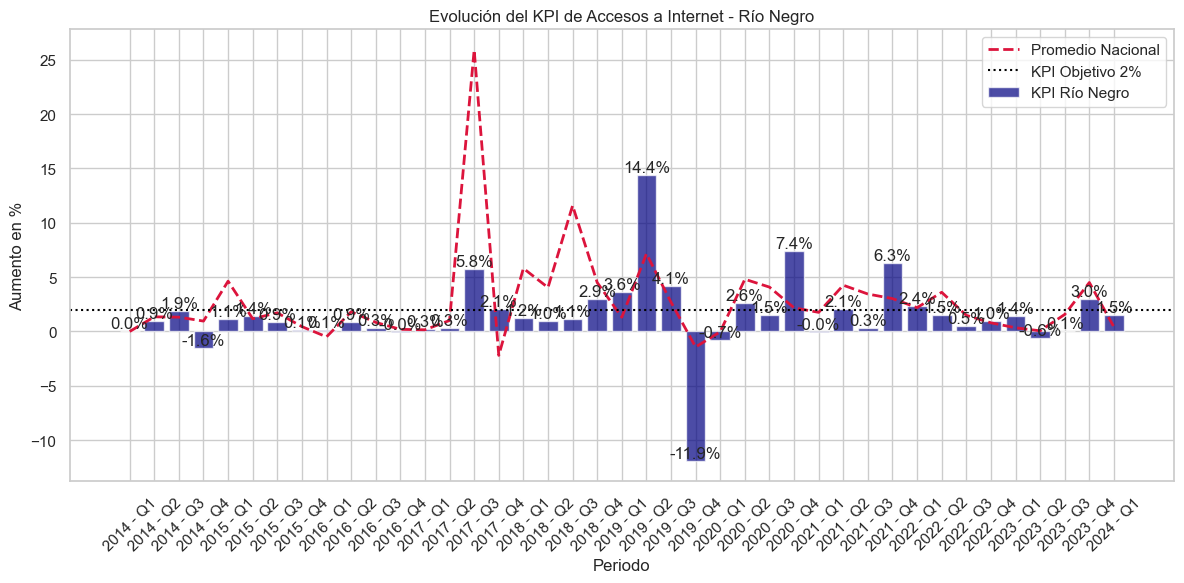

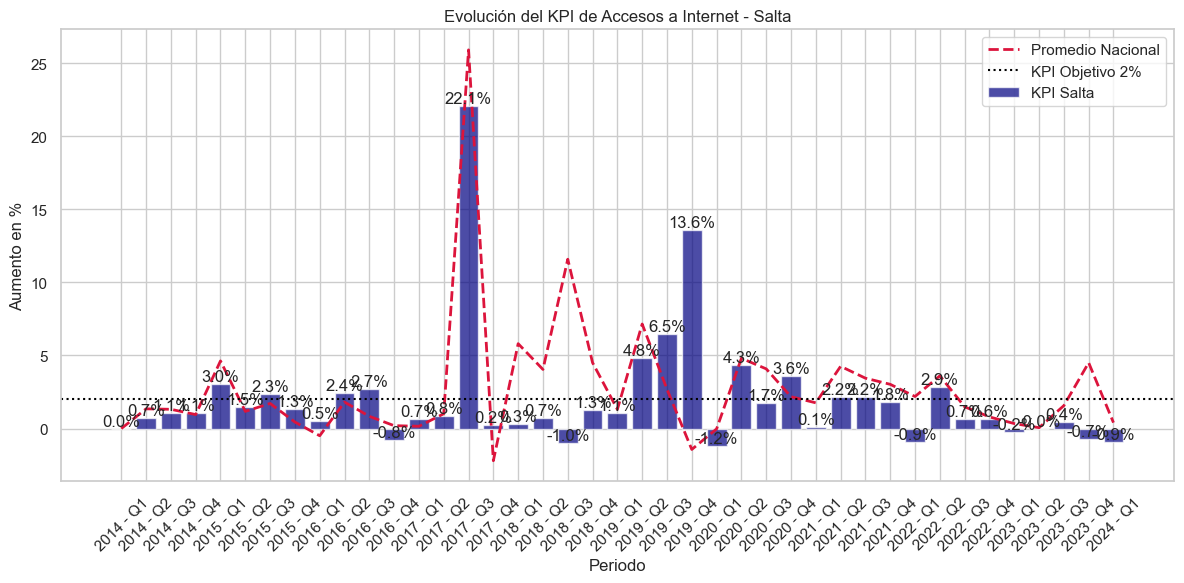

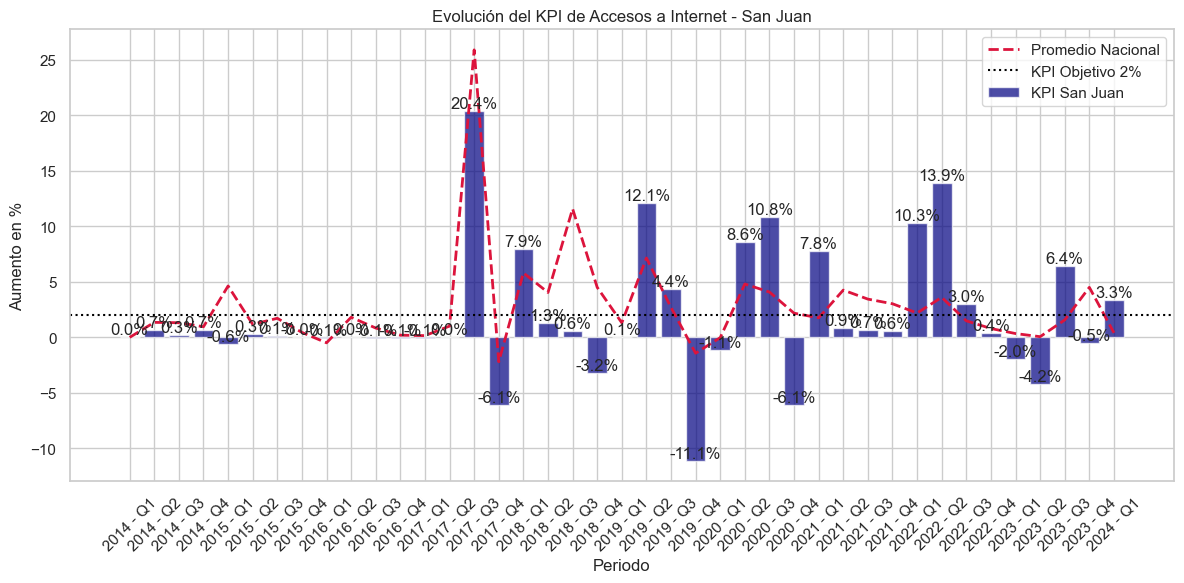

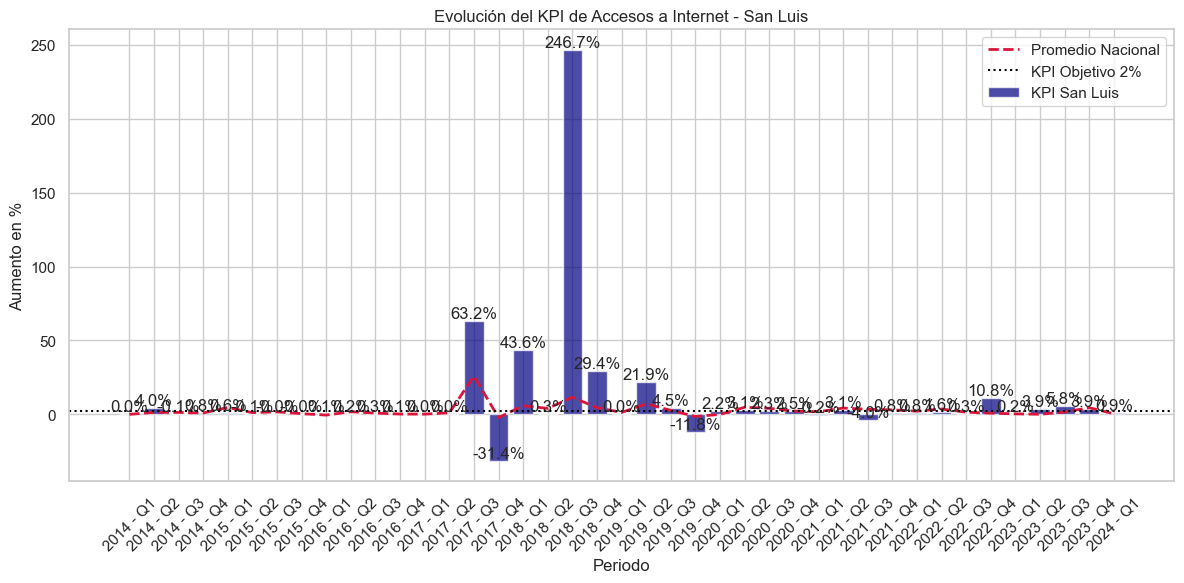

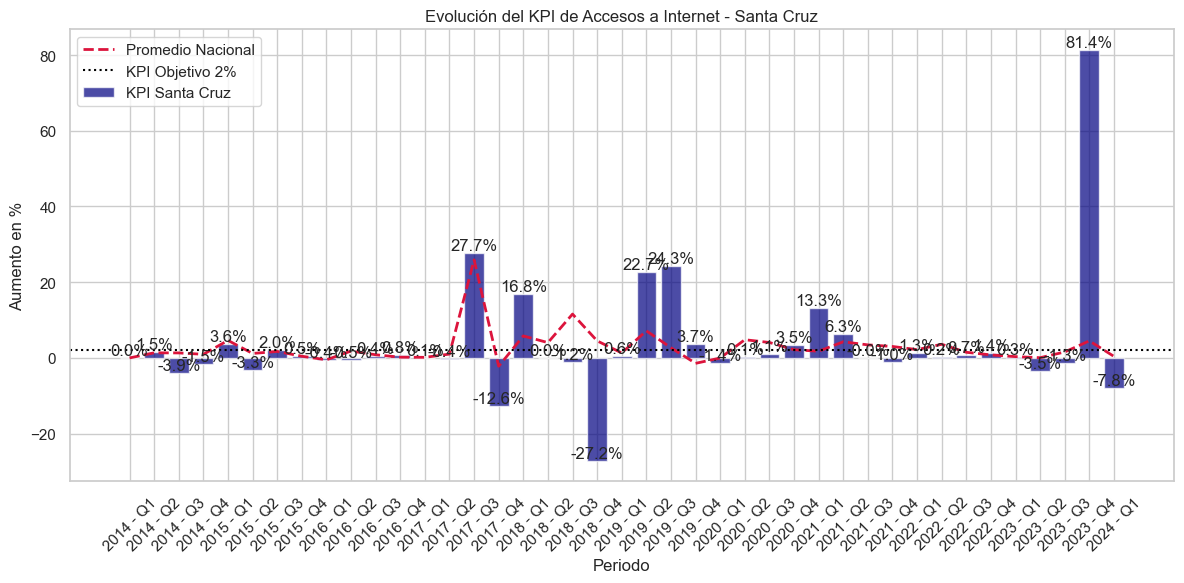

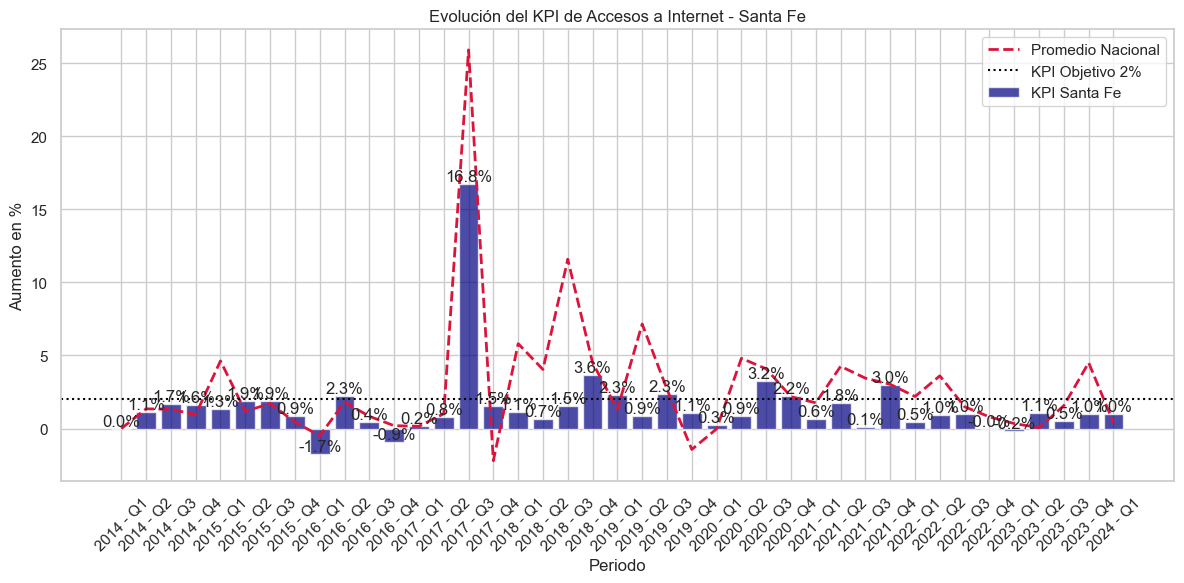

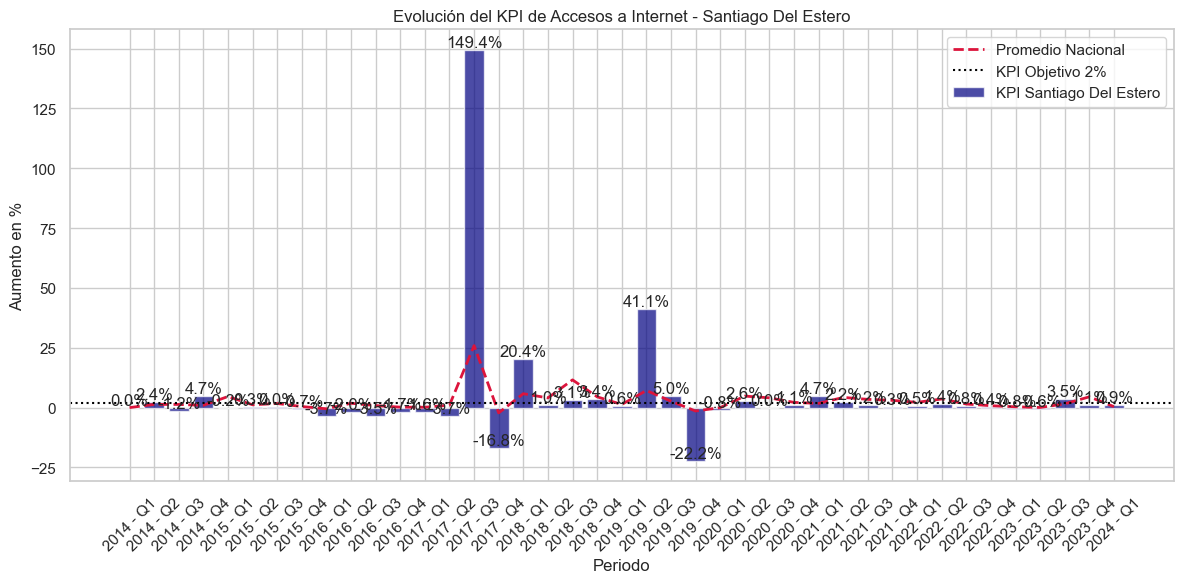

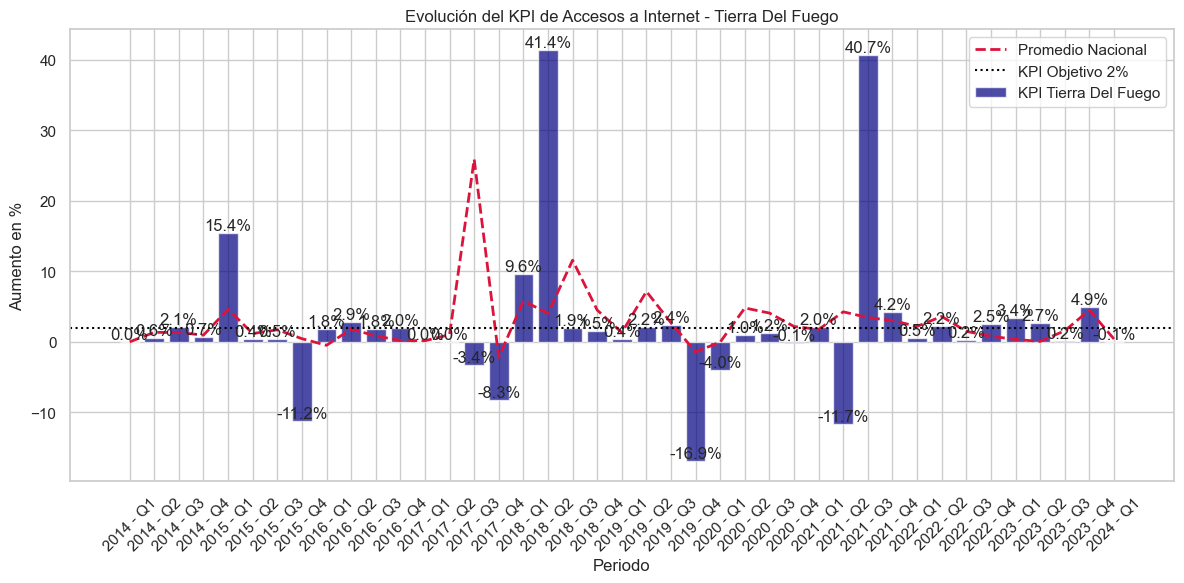

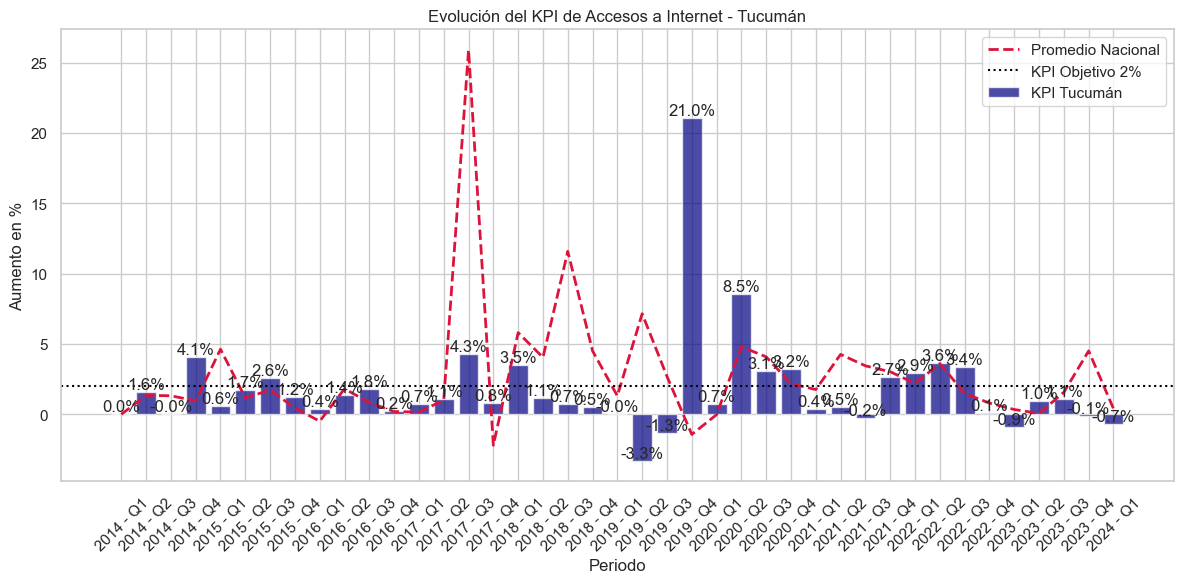

In [231]:
def plot_kpi(df, promedio_nacional_kpi, kpi_objetivo=2):
    provincias = df['Provincia'].unique()

    for provincia in provincias:
        plt.figure(figsize=(12, 6))
        df_provincia = df[df['Provincia'] == provincia]
        
        # Gráfica de barras para el KPI de la provincia
        plt.bar(df_provincia['Periodo'], df_provincia['KPI'], label=f'KPI {provincia}', color='navy', alpha=0.7)

        # Graficar el promedio nacional
        plt.plot(promedio_nacional_kpi['Periodo'], promedio_nacional_kpi['KPI'], linestyle='--', color='crimson', linewidth=2, label='Promedio Nacional')

        # Línea horizontal para el KPI objetivo
        plt.axhline(y=kpi_objetivo, color='black', linestyle='dotted', label='KPI Objetivo 2%')

        # Anotaciones
        for index, value in enumerate(df_provincia['KPI']):
            plt.text(x=df_provincia['Periodo'].iloc[index], y=value, s=f"{value:.1f}%", ha='center', va='bottom')

        plt.xlabel('Periodo')
        plt.ylabel('Aumento en %')
        plt.title(f'Evolución del KPI de Accesos a Internet - {provincia}')
        plt.legend()
        plt.grid(True)
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

# Llamar a la función con los DataFrames preparados
plot_kpi(df, promedio_nacional_kpi)


En las graficas presentados anteriormente, se observa que, históricamente, el año 2017 marcó el periodo de mayor crecimiento a nivel nacional. Sin embargo, de manera general, este crecimiento no se ha sostenido en ninguna de las provincias.

Asimismo, se evidencia que, aunque la tendencia nacional indica un aumento del 2% en nuevos accesos, este dato no refleja adecuadamente el cumplimiento del KPI (2% por provincia), dado que está significativamente influenciado por outliers, como es el caso de Santa Cruz, que registró un incremento del 80%. Esto es coherente con el análisis previo sobre la desigualdad en la red entre provincias.

Además, es destacable la tendencia a la baja de esta métrica a medida que el número total de accesos aumenta.

Considero que sería valioso incorporar una visualización que analice el nivel de desigualdad en el acceso a internet a nivel nacional. Para ello, utilizaremos el número de accesos por cada 100 hogares en cada provincia y el promedio nacional para calcular un coeficiente

              Provincia  KPI  Crecimiento de Accesos  Penetración de Internet
0          Buenos Aires  2.0                  1.6220                 0.001608
1       Capital Federal  2.0                  2.3906                 0.007944
2             Catamarca  2.0                  1.3764                 0.091842
3                 Chaco  2.0                  0.9340                 0.030024
4                Chubut  2.0                  1.6978                 0.049738
6            Corrientes  2.0                  1.0388                 0.032895
5               Córdoba  2.0                  1.8140                 0.008381
7            Entre Ríos  2.0                  1.3862                 0.023372
8               Formosa  2.0                  0.7922                 0.063156
9                 Jujuy  2.0                  1.1530                 0.048834
10             La Pampa  2.0                  2.0098                 0.082237
11             La Rioja  2.0                  1.6006            

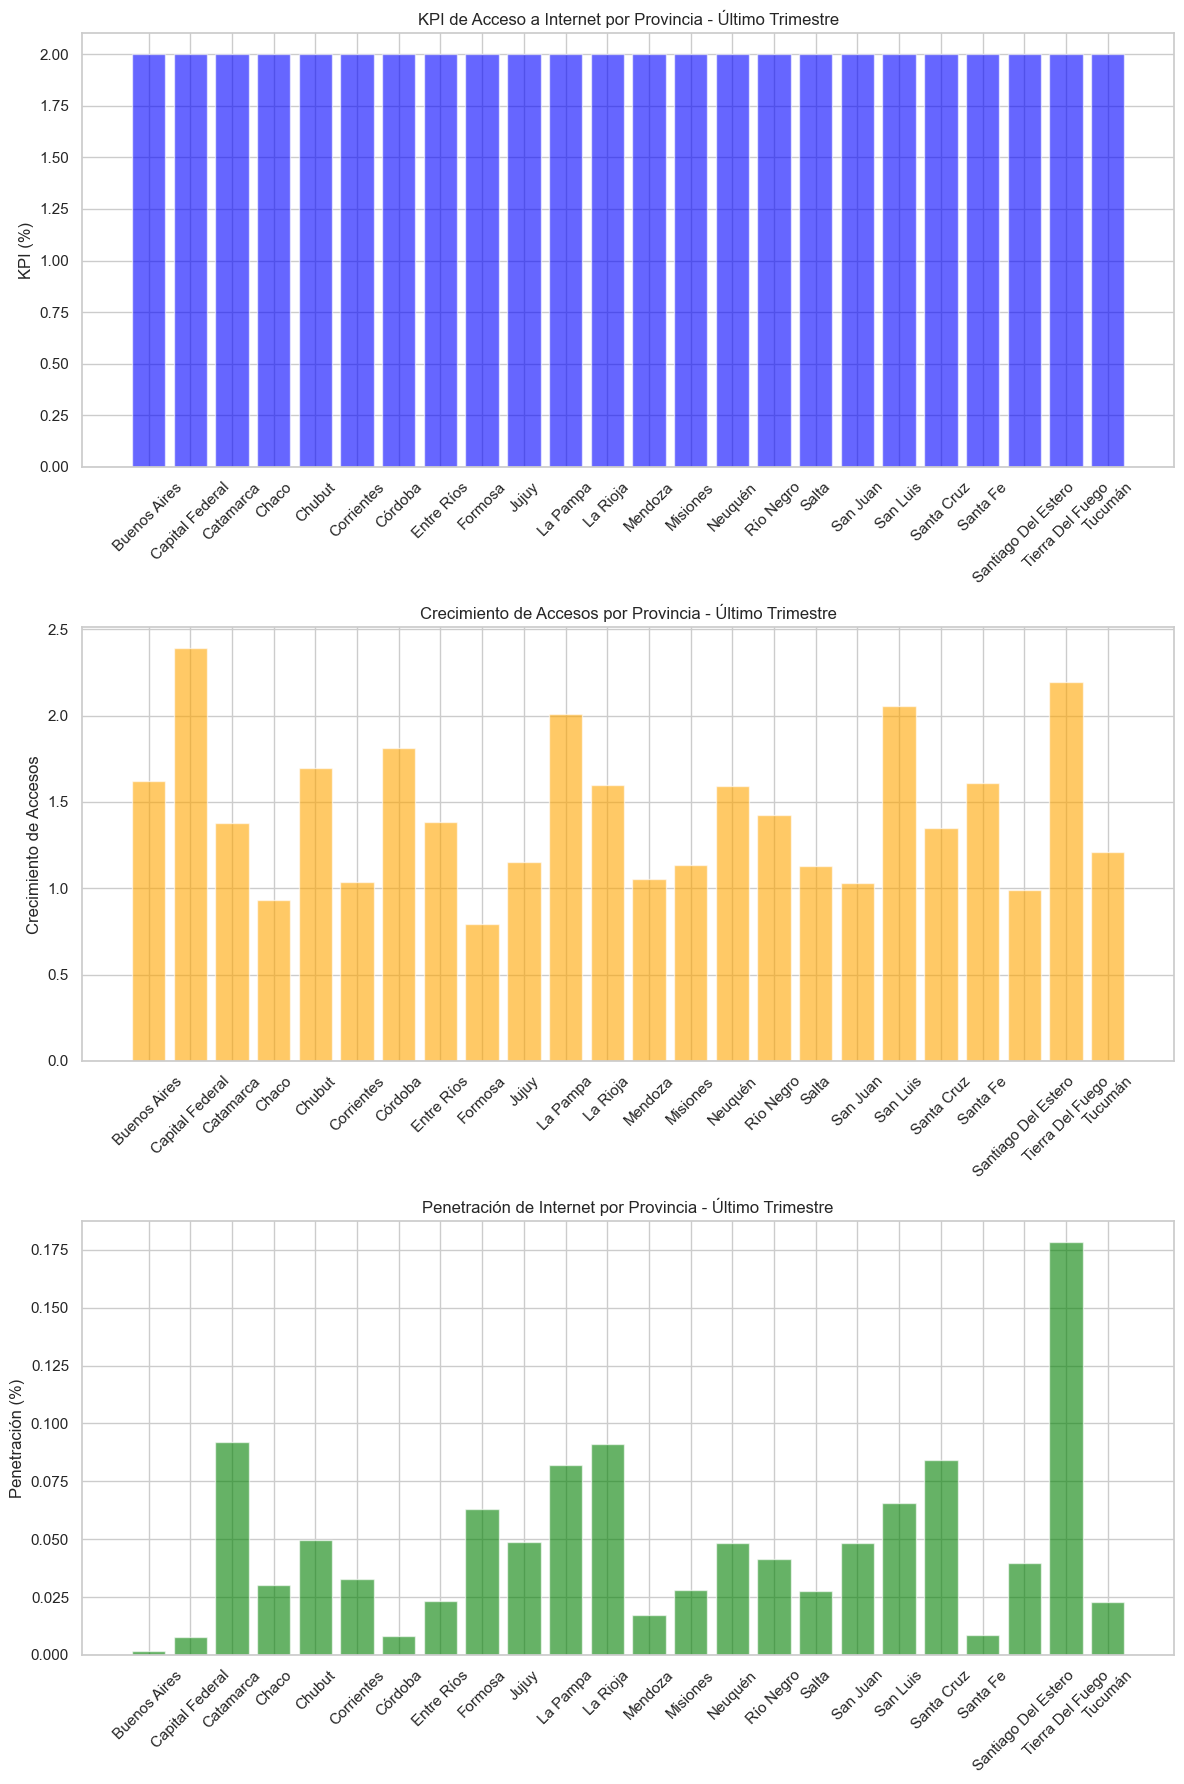

In [252]:
import pandas as pd
import matplotlib.pyplot as plt

# Supongamos que tu DataFrame se llama df y tiene las columnas necesarias

# Obtener el último trimestre
ultimo_año = df['Año'].max()
ultimo_trimestre = df[df['Año'] == ultimo_año]
ultimo_trimestre = ultimo_trimestre[ultimo_trimestre['Trimestre'] == ultimo_trimestre['Trimestre'].max()]
Nuevos_Accesos = ultimo_trimestre['Accesos por cada 100 hogares'] * 1.02

# Verificar los datos filtrados
#print(ultimo_trimestre[['Provincia', 'Accesos por cada 100 hogares', 'Nuevos Accesos']])

# Calcular los KPIs
ultimo_trimestre['KPI'] = ( (Nuevos_Accesos - ultimo_trimestre['Accesos por cada 100 hogares']) / ultimo_trimestre['Accesos por cada 100 hogares']) * 100
ultimo_trimestre['Crecimiento de Accesos'] = Nuevos_Accesos - ultimo_trimestre['Accesos por cada 100 hogares']
# Asegúrate de que 'Total' sea el total de hogares en la provincia
ultimo_trimestre['Penetración de Internet'] = (ultimo_trimestre['Accesos por cada 100 hogares'] / ultimo_trimestre['Total']) * 100

# Verificar los KPIs calculados
print(ultimo_trimestre[['Provincia', 'KPI', 'Crecimiento de Accesos', 'Penetración de Internet']])

# Graficar KPIs
fig, axs = plt.subplots(3, 1, figsize=(12, 18))

# Gráfico de KPI
axs[0].bar(ultimo_trimestre['Provincia'], ultimo_trimestre['KPI'], color='blue', alpha=0.6)
axs[0].set_title('KPI de Acceso a Internet por Provincia - Último Trimestre')
axs[0].set_ylabel('KPI (%)')
axs[0].set_xticklabels(ultimo_trimestre['Provincia'], rotation=45)

# Gráfico de Crecimiento de Accesos
axs[1].bar(ultimo_trimestre['Provincia'], ultimo_trimestre['Crecimiento de Accesos'], color='orange', alpha=0.6)
axs[1].set_title('Crecimiento de Accesos por Provincia - Último Trimestre')
axs[1].set_ylabel('Crecimiento de Accesos')
axs[1].set_xticklabels(ultimo_trimestre['Provincia'], rotation=45)

# Gráfico de Penetración de Internet
axs[2].bar(ultimo_trimestre['Provincia'], ultimo_trimestre['Penetración de Internet'], color='green', alpha=0.6)
axs[2].set_title('Penetración de Internet por Provincia - Último Trimestre')
axs[2].set_ylabel('Penetración (%)')
axs[2].set_xticklabels(ultimo_trimestre['Provincia'], rotation=45)

plt.tight_layout()
plt.show()


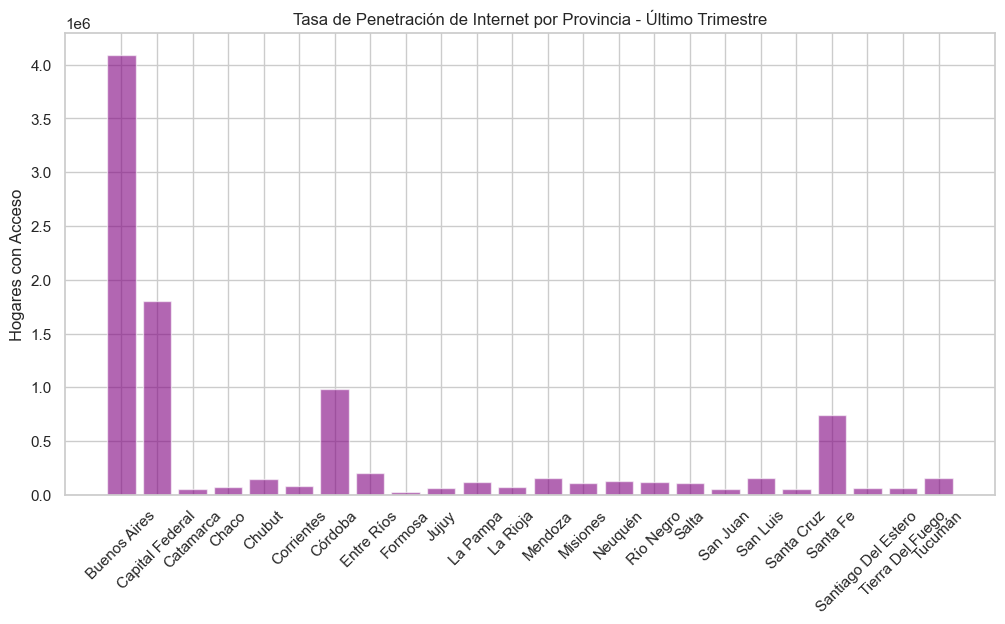

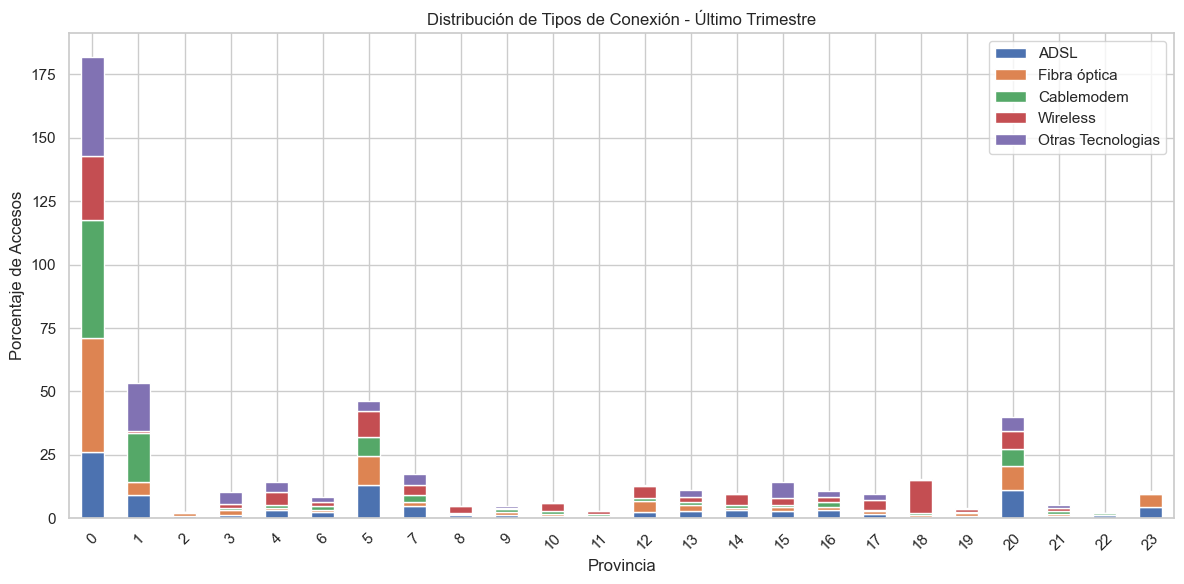

In [257]:
# Calcular la Tasa de Penetración de Internet
ultimo_trimestre['Tasa de Penetración'] = (ultimo_trimestre['Accesos por cada 100 hogares'] / 100) * ultimo_trimestre['Total']

# Calcular el Cambio en la Calidad de Conexión
# Primero, necesitas tener los datos del trimestre anterior, aquí asumimos que tienes esos datos
# Se debe crear un DataFrame previo llamado 'trimestre_anterior' similar al actual.
# Para el ejemplo, tomamos la última fila de 'ultimo_trimestre' como si fuera el anterior
trimestre_anterior = df[(df['Año'] == ultimo_año) & (df['Trimestre'] == (ultimo_trimestre['Trimestre'].max() - 1))]

# Verificar que existe el trimestre anterior
if not trimestre_anterior.empty:
    ultimo_trimestre['Cambio en Calidad'] = ((ultimo_trimestre['Mbps (Media de bajada)'] - trimestre_anterior['Mbps (Media de bajada)'].values) / trimestre_anterior['Mbps (Media de bajada)'].values) * 100
else:
    ultimo_trimestre['Cambio en Calidad'] = 0

# Gráfico de Tasa de Penetración
plt.figure(figsize=(12, 6))
plt.bar(ultimo_trimestre['Provincia'], ultimo_trimestre['Tasa de Penetración'], color='purple', alpha=0.6)
plt.title('Tasa de Penetración de Internet por Provincia - Último Trimestre')
plt.ylabel('Hogares con Acceso')
plt.xticks(rotation=45)
plt.show()

# Gráfico de Distribución de Tipos de Conexión
# Primero calculamos los porcentajes
tipos_conexion = ultimo_trimestre[['ADSL', 'Fibra óptica', 'Cablemodem', 'Wireless', 'Otras Tecnologias']]
tipos_conexion_sum = tipos_conexion.sum()
tipos_conexion_porcentaje = (tipos_conexion / tipos_conexion_sum) * 100

# Gráfico de Distribución de Tipos de Conexión
tipos_conexion_porcentaje.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Distribución de Tipos de Conexión - Último Trimestre')
plt.ylabel('Porcentaje de Accesos')
plt.xlabel('Provincia')
plt.legend(tipos_conexion.columns)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


2.  Tasa de Penetración de Internet
Definición del KPI:

Fórmula:
Tasa de Penetracion= (Accesos por cada 100 hogares/100)× Total

Descripción: Este KPI mide cuántos hogares tienen acceso a Internet en relación con la población total de la provincia. Es un indicador directo de la disponibilidad y uso de Internet en una comunidad.
Relevancia: Muestra cómo la penetración de Internet está creciendo en cada provincia, lo cual es crucial para evaluar el desarrollo tecnológico y social.
Impacto en Políticas Públicas: Las autoridades pueden utilizar este KPI para identificar áreas que requieren mejoras en infraestructura y servicios de Internet.
Comparaciones Regionales: Permite comparar la penetración de Internet entre diferentes provincias, identificando disparidades.

3. Distribución de Tipos de Conexión
Definición del KPI:

Este KPI muestra la proporción de accesos a Internet según el tipo de tecnología utilizada (ADSL, Fibra óptica, Cablemodem, Wireless, Otras Tecnologías) en cada provincia durante el último trimestre.
Relevancia:

Identificación de Preferencias: Permite identificar qué tipo de conexión es más popular en cada provincia, lo que puede indicar preferencias del consumidor y la efectividad de las inversiones en tecnología.
Planificación de Infraestructura: Ayuda a las empresas y a los gobiernos a tomar decisiones informadas sobre dónde invertir en mejoras de infraestructura, ya que una tecnología menos utilizada podría necesitar más atención.
Evaluación de la Calidad: Diferentes tecnologías ofrecen diferentes niveles de velocidad y estabilidad. Por ejemplo, la fibra óptica generalmente proporciona una conexión de mayor calidad en comparación con ADSL o Cablemodem.

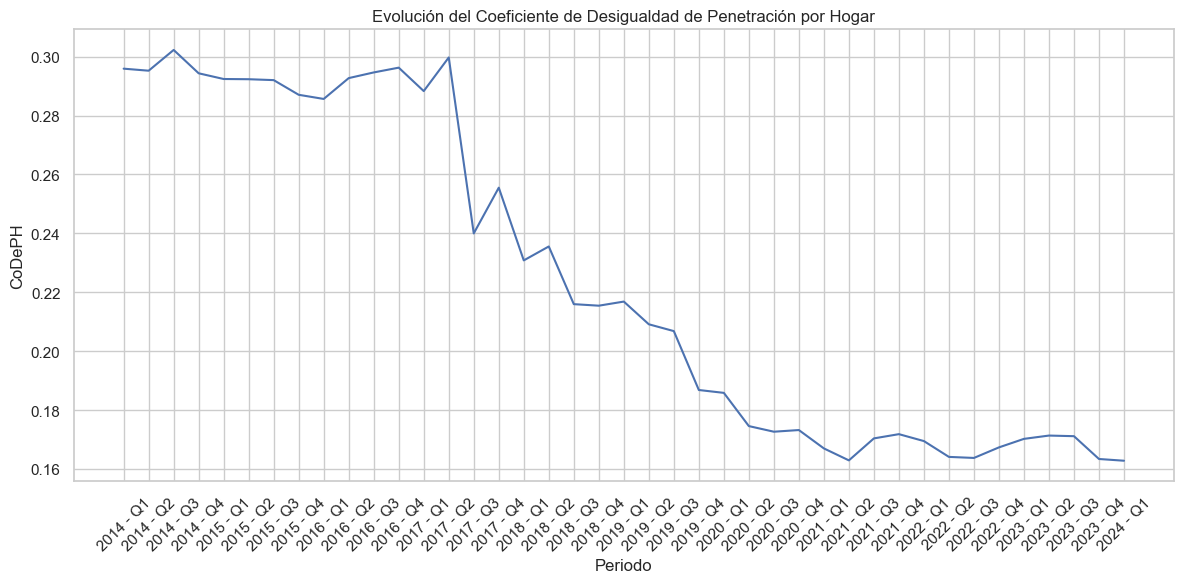

In [262]:
# Calcular el promedio nacional de accesos por periodo
df['Accesos por cada 100 hogares (nacional)'] = df.groupby('Periodo')['Accesos por cada 100 hogares'].transform('mean')

# Definir función para calcular el coeficiente de Gini
def gini_coefficient(x):
    """Calcula el coeficiente de Gini para una serie de datos."""
    n = len(x)
    x_sorted = np.sort(x)
    index = np.arange(1, n + 1)
    return (np.sum((2 * index - n - 1) * x_sorted)) / (n * np.sum(x_sorted))

# Calcular el coeficiente de Gini por periodo
df['Coeficiente de Desigualdad de Penetración por Hogar'] = df.groupby('Periodo')['Accesos por cada 100 hogares'].transform(gini_coefficient)

# Ordenar el DataFrame por periodo
df = df.sort_values(by='Periodo')

# Graficar el CoDePH a lo largo del tiempo
plt.figure(figsize=(12, 6))
plt.plot(df['Periodo'], df['Coeficiente de Desigualdad de Penetración por Hogar'], linestyle='-', color='b')
plt.xlabel('Periodo')
plt.ylabel('CoDePH')
plt.title('Evolución del Coeficiente de Desigualdad de Penetración por Hogar')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()